# Personal Loan Campaign project - Problem Statement


# Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

# Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: The family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have a securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use Internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?

# Importing necessary libraries

In [ ]:
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
df_copy = df.copy()

# **Data Overview - Data background and contents**


## View the first and last 5 rows of the dataset.

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Understand the shape of the dataset.

In [ ]:
df.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

## Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**:

* **Data Types**: All columns are either integers (int64) or floating-point numbers (float64).
* Non-Null Values: The info() output shows that all columns have 5000 non-null entries, which means there are no missing values in this dataset. This is good as we won't need to handle missing data at this stage.

**Based on the column names and the information provided in the data dictionary, the following columns could be considered as categorical or object types, even though they are currently stored as integers:**

* **ZIPCode**: While stored as an integer, ZIP codes are geographical identifiers and not numerical quantities that you would perform mathematical operations on. They represent categories of locations.
* **Education**: This column represents distinct education levels (Undergrad, Graduate, Advanced/Professional), which are categories.
* **Personal_Loan**: This is the target variable and is a binary categorical variable (0 for no loan, 1 for loan).
* **Securities_Account**: This is a binary categorical variable (0 or 1).
* **CD_Account**: This is a binary categorical variable (0 or 1).
* **Online**: This is a binary categorical variable (0 or 1).
* **CreditCard**: This is a binary categorical variable (0 or 1).

These columns represent distinct groups or categories rather than continuous numerical values. Converting them to a categorical data type can be beneficial for certain types of analysis and modeling.




# Statistical summary of the data

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **Observations:**

* **Age**: The mean age is approximately 45 years, and the mean experience is approximately 20 years. - Appears to be suspicious/ misleading data
* **Experience**: There appears to be a potential problem with "Experience" since the minimum value is -3, which is unrealistic. This requires further investigation and possible cleaning.
* **Income**: The median income is approximately 73.8 thousand, with a broad range from 8 thousand to 224 thousand.
The standard deviation is also fairly high (224 thousand). The standard deviation is also fairly high (46 thousand), which suggests a very big spread between income levels.
* **ZIPCode**: ZIP codes are geographical identifiers and their descriptive statistics are not very useful here.
* **Family**: The mean family size is approximately 2.4, between 1 and 4.
* **CCAvg**: The mean credit card expenditure is approximately 1.9 thousand per month, with the maximum being 1.9 thousand per month, with a limit of 10 thousand.
* **Education**: Mean education level is approximately 1.88, between Undergrad (1) and Graduate (2). The values vary between 1 and 3, validating the three education levels - need to make changes in data set
* **Mortgage**: The mean mortgage value is approximately 56.5 thousand, but the high point is very much 56.5 thousand, but the high point is very much 635 thousand. The 25th, 50th, and 75th percentiles are all 0, which means most of the customers do not own a mortgage.
* **Personal_Loan**: Mean is 0.096, indicating that 9.6% of the customers in this data accepted the personal loan. This suggests an unbalanced data set, which must be kept in mind when building the model.
* **Securities_Account, CD_Account, Online, CreditCard**: These are 0/1 binary variables. The means indicate the ratio of customers with these accounts or using these services.

**Key Observations and Potential Issues:**
* The lowest value of "Experience" is -3, an outlier, which should be taken care of at the data cleaning stage.
* Target variable "Personal_Loan" is unbalanced, with fewer customers who took the loan. This will need special thought when choosing models and evaluating them.
* "Mortgage" contains a high number of zeros, which indicates that most of the customer base does not have a mortgage.


# Checking random samples

In [ ]:
sample_df = df.sample(6).copy()

print("Sample before cleaning:")
display(sample_df)

# Replace negative experience values within the sample directly with 0 for demonstration
sample_df.loc[sample_df['Experience'] < 0, 'Experience'] = 0

print("\nSample after cleaning:")
display(sample_df)

# Verify cleaning in the sample
print("\nVerifying cleaning in sample:")
display(sample_df[sample_df['Experience'] < 0])

Sample before cleaning:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2225,2226,54,24,25,90505,4,0.4,3,115,0,0,0,0,0
2467,2468,40,16,83,92350,1,0.8,2,230,0,1,0,1,0
984,985,50,25,15,92173,1,0.4,3,0,0,0,0,0,0
649,650,25,-1,82,92677,4,2.1,3,0,0,0,0,1,0
139,140,59,35,18,93305,1,1.2,3,0,0,0,0,1,0
3759,3760,31,4,29,92093,4,1.5,2,121,0,0,0,1,1



Sample after cleaning:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2225,2226,54,24,25,90505,4,0.4,3,115,0,0,0,0,0
2467,2468,40,16,83,92350,1,0.8,2,230,0,1,0,1,0
984,985,50,25,15,92173,1,0.4,3,0,0,0,0,0,0
649,650,25,0,82,92677,4,2.1,3,0,0,0,0,1,0
139,140,59,35,18,93305,1,1.2,3,0,0,0,0,1,0
3759,3760,31,4,29,92093,4,1.5,2,121,0,0,0,1,1



Verifying cleaning in sample:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


* The most obvious anomaly present in this sample is the negative value in the 'Experience' column for the row with ID 650, where the experience is listed as -1.0. As we've discussed, a negative value for professional experience is not realistic and indicates a data quality issue.
* Successfully demonstrated cleaning the anomaly in a sample.
* Replacing negative 'Experience' values with the median experience for each age group from the full dataset is a more robust approach than simply using 0 for the entire dataset.


# Checking the columns present in the data

In [ ]:
# COLUMNS PRESENT IN DATA
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

**Observations:**

There are 14 columns in your DataFrame.

The names of the columns are: 'ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'.

In [ ]:
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


**Observations:**

This cell displays the data type for each of the 14 columns in your DataFrame. We can observe that most columns are of integer type (int64), while 'Experience' and 'CCAvg' are floating-point numbers (float64).

**Based on the column names and the information provided in the data dictionary, the following columns could be considered as categorical or object types, even though they are currently stored as integers:**

* ZIPCode: While stored as an integer, ZIP codes are geographical identifiers and not numerical quantities that you would perform mathematical operations on. They represent categories of locations.
* Education: This column represents distinct education levels (Undergrad, Graduate, Advanced/Professional), which are categories.
* Personal_Loan: This is the target variable and is a binary categorical variable (0 for no loan, 1 for loan).
* Securities_Account: This is a binary categorical variable (0 or 1).
* CD_Account: This is a binary categorical variable (0 or 1).
* Online: This is a binary categorical variable (0 or 1).
* CreditCard: This is a binary categorical variable (0 or 1). These columns represent distinct groups or categories rather than continuous numerical values. Converting them to a categorical data type can be beneficial for certain types of analysis and modeling.

# Checking Missing Values

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


**Observation**: All columns have 0 missing values.

# Dropping the duplicate values

In [ ]:
df.duplicated().sum()

np.int64(0)

**Observations:** The output shows a count of 0 duplicate rows

In [ ]:
df.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


**Observations:**

**High Unique Values:** Columns like 'ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', and 'Mortgage' have a relatively high number of unique values.
* 'ID' having 5000 unique values is expected as it's a unique identifier for each customer.
* 'Income', 'CCAvg', and 'Mortgage' are likely continuous numerical variables. * 'Age' and 'Experience' also show a range of unique values.
* 'ZIPCode' has 467 unique values, indicating it represents distinct geographical areas.

**Low Unique Values**: Columns like 'Family' (4), 'Education' (3), 'Personal_Loan' (2), 'Securities_Account' (2), 'CD_Account' (2), 'Online' (2), and 'CreditCard' (2) have a very low number of unique values. This strongly suggests that these columns are categorical variables. 'Personal_Loan' having only 2 unique values (0 and 1) confirms it's our binary target variable.
What to do next?

These observations are important for data preparation. Knowing which columns are categorical helps us decide how to handle them for machine learning models. For instance, we might need to use techniques like one-hot encoding for some of these categorical features.

**Based on this, here are some potential next steps:**

* **Handle Categorical Variables**: Convert the identified categorical columns into a format suitable for modeling
* **Drop Irrelevant Columns**: drop the 'ID' column as it's just an identifier and won't be useful for prediction.
* **Explore Distributions of Numerical Features:** Visualize the distributions of numerical columns (like 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage') to check for outliers or skewness that might require scaling or transformation.
* **Analyze Relationships:** Start exploring the relationships between the features and the target variable (Personal_Loan) to understand which factors might be most influential in predicting loan acceptance.


# Drop the columns after checking the duplicates

In [ ]:
# drop the ID Columns
df.drop(columns=['ID'], inplace=True)
print(df.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


Dropped the 'ID' column as it's just an identifier and won't be useful for prediction.

# Data Preprocessing

In [ ]:
print("Columns after dropping ID:")
display(df.columns)

Columns after dropping ID:


Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
!pip install uszipcode -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Convert ZIPCode to string to extract the first two digits
df['ZIPCode_2Digit'] = df['ZIPCode'].astype(str).str[:2]

# Display the first few rows with the new column
display(df[['ZIPCode', 'ZIPCode_2Digit']].head())

# Check the number of unique values in the new column
print("\nNumber of unique values in ZIPCode_2Digit:", df['ZIPCode_2Digit'].nunique())

,ZIPCode,ZIPCode_2Digit
0,91107,91
1,90089,90
2,94720,94
3,94112,94
4,91330,91



Number of unique values in ZIPCode_2Digit: 7


* Successfully created a new column called ZIPCode_2Digit by extracting the first two digits from the original ZIPCode.
* The display(df[['ZIPCode', 'ZIPCode_2Digit']].head()) output shows that the extraction worked correctly, with the first two digits of the ZIPCode appearing in the new ZIPCode_2Digit column for the first few rows.
* The print statement confirms that the number of unique values in the ZIPCode_2Digit column is now 7. This is a significant reduction from the original 467 unique values in the full ZIPCode column, which simplifies this feature for potential use in a model.
These observations confirm that we have successfully created a simplified categorical feature from the original ZIP code.

In [ ]:
# Replace negative experience values with their absolute value
df['Experience'] = df['Experience'].apply(lambda x: abs(x) if x < 0 else x)

print("Negative experience values replaced with absolute values.")

Negative experience values replaced with absolute values.


In [ ]:
# Verify that there are no more negative experience values
remaining_negative_experience_rows = df[df['Experience'] < 0]
num_negative_experience = len(remaining_negative_experience_rows)

print(f"Number of rows with negative experience after cleaning: {num_negative_experience}")

display(remaining_negative_experience_rows)

Number of rows with negative experience after cleaning: 0


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_2Digit


In [ ]:
# Map numerical education levels to descriptive labels
education_mapping = {1: 'Undergrad', 2: 'Grad', 3: 'PostGrad'}
df['Education'] = df['Education'].map(education_mapping)

# Display the first few rows to see the updated Education column
display(df.head())

# Check the unique values in the updated Education column
print("\nUnique values in Education after mapping:")
display(df['Education'].unique())

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_2Digit
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,91
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,90
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,94
3,35,9,100,94112,1,2.7,Grad,0,0,0,0,0,0,94
4,35,8,45,91330,4,1.0,Grad,0,0,0,0,0,1,91



Unique values in Education after mapping:


array(['Undergrad', 'Grad', 'PostGrad'], dtype=object)

In [ ]:
# Identify categorical columns
categorical_cols = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account','Family','Online', 'CreditCard', 'ZIPCode_2Digit']

# Convert identified categorical columns to 'category' data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Display the data types to verify the conversion
print("Data types after converting categorical columns:")
display(df.dtypes)

Data types after converting categorical columns:


,0
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,category
CCAvg,float64
Education,category
Mortgage,int64
Personal_Loan,category
Securities_Account,category


In [ ]:
bins = [df['Age'].min() - 1, 30, 40, 50, 60, df['Age'].max() + 1]
labels = ['20-30', '30-40', '40-50', '50-60', '60+']

# Create the Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows with the new column and check value counts
display(df[['Age', 'Age_Group']].head())
print("\nValue counts for Age_Group:")
display(df['Age_Group'].value_counts())

,Age,Age_Group
0,25,20-30
1,45,40-50
2,39,30-40
3,35,30-40
4,35,30-40



Value counts for Age_Group:


,count
Age_Group,
50-60,1334
40-50,1257
30-40,1247
60+,674
20-30,488


In [ ]:
# Drop the ZIPCode column

try:
    df.drop(columns=['ZIPCode'], inplace=True)
    print("Original ZIPCode column dropped.")
except KeyError:
    print("ZIPCode column not found in the DataFrame, it might have been dropped already.")

display(df.columns)

Original ZIPCode column dropped.


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'ZIPCode_2Digit', 'Age_Group'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCode_2Digit      5000 non-null   category
 13  Age_Group           5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 240.9 KB


**Observations:**

* We dropped “ID” because it is an identifier and has no predictive power.  
* We also created a simplified “ZIPCode_2Digit” feature from “ZIPCode” to reduce cardinality from 467 to 7 categories, then dropped the original “ZIPCode” column.
* Replaced negative experience values.
* Mapped numerical education levels to descriptive labels -{1 as 'Undergrad', 2 as 'Grad', 3 as 'PostGrad'}.
* Coverted required columns into category type (Education,
Personal_Loan – target variable (0 = no, 1 = yes), Securities_Account – binary (0/1), CD_Account – binary (0/1), Online – binary (0/1),CreditCard – binary (0/1),ZIPCode_2Digit – grouped ZIP code categories)
* Added a age group column to make it simpler



## Exploratory Data Analysis

The below functions need to be defined to carry out the EDA.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

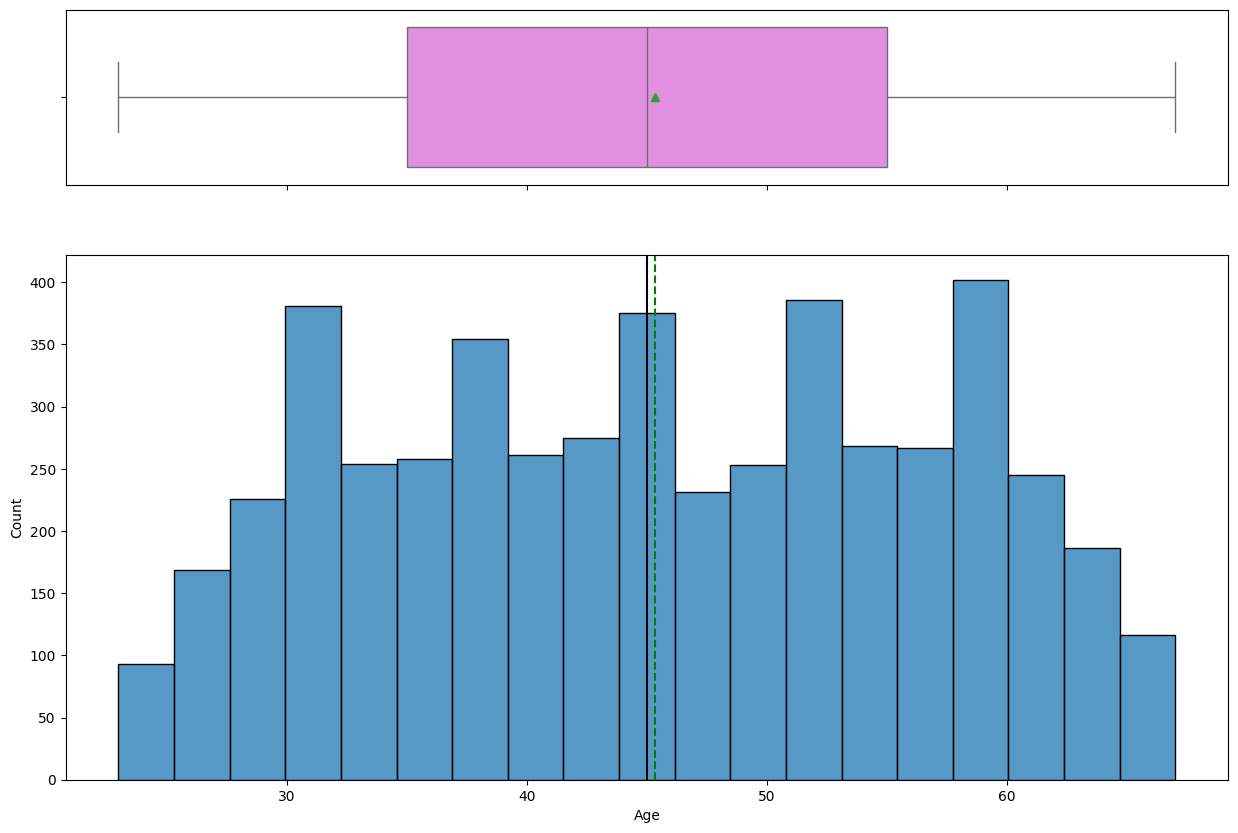

In [ ]:
histogram_boxplot(df, 'Age')

* The distribution of 'Age' is fairly symmetrical and appears to be centered around the mean and median (which are very close to each other as indicated by the lines in the histogram and the position of the mean marker in the boxplot).

* There don't seem to be any significant outliers in the age distribution.

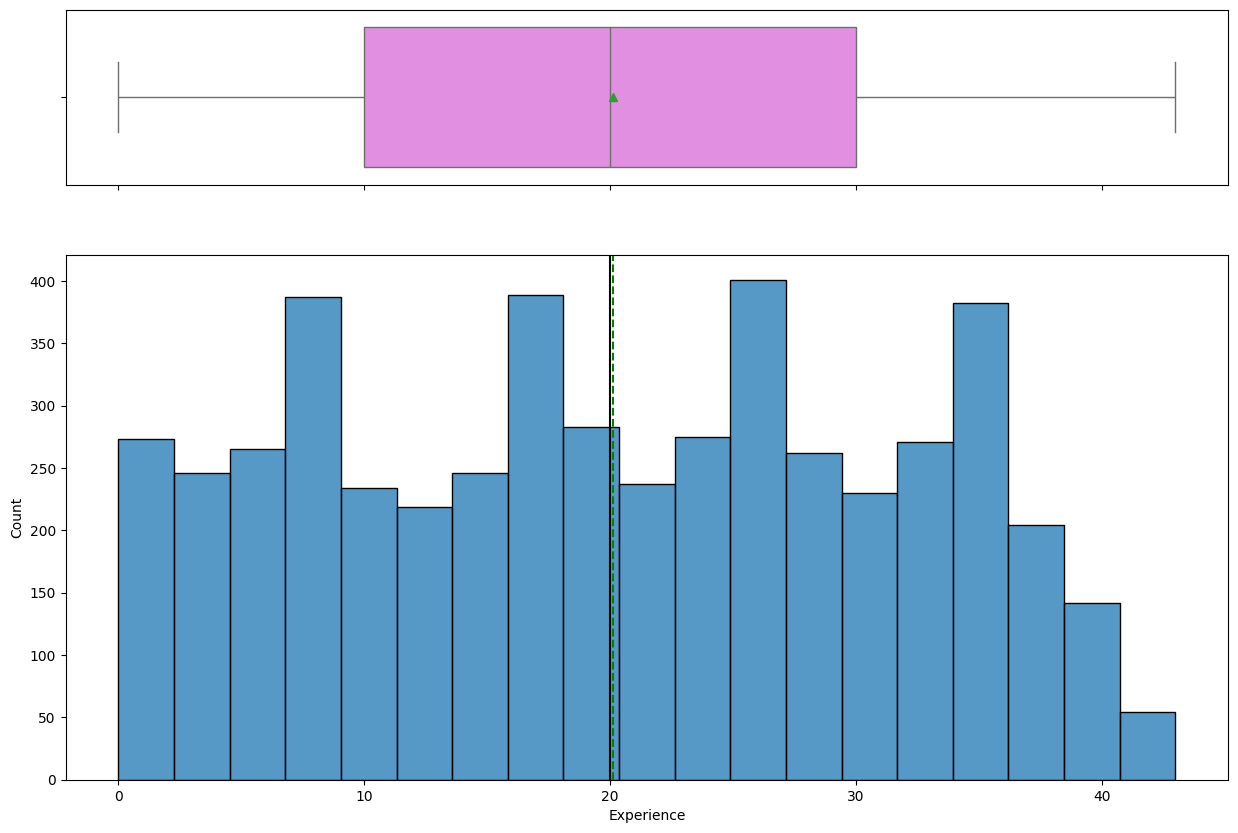

In [ ]:
histogram_boxplot(df, 'Experience')

* The distribution of 'Experience' is also fairly symmetrical and appears to be centered around its mean.

* After handling the initial negative values during data preprocessing, the boxplot does not show problematic outliers.


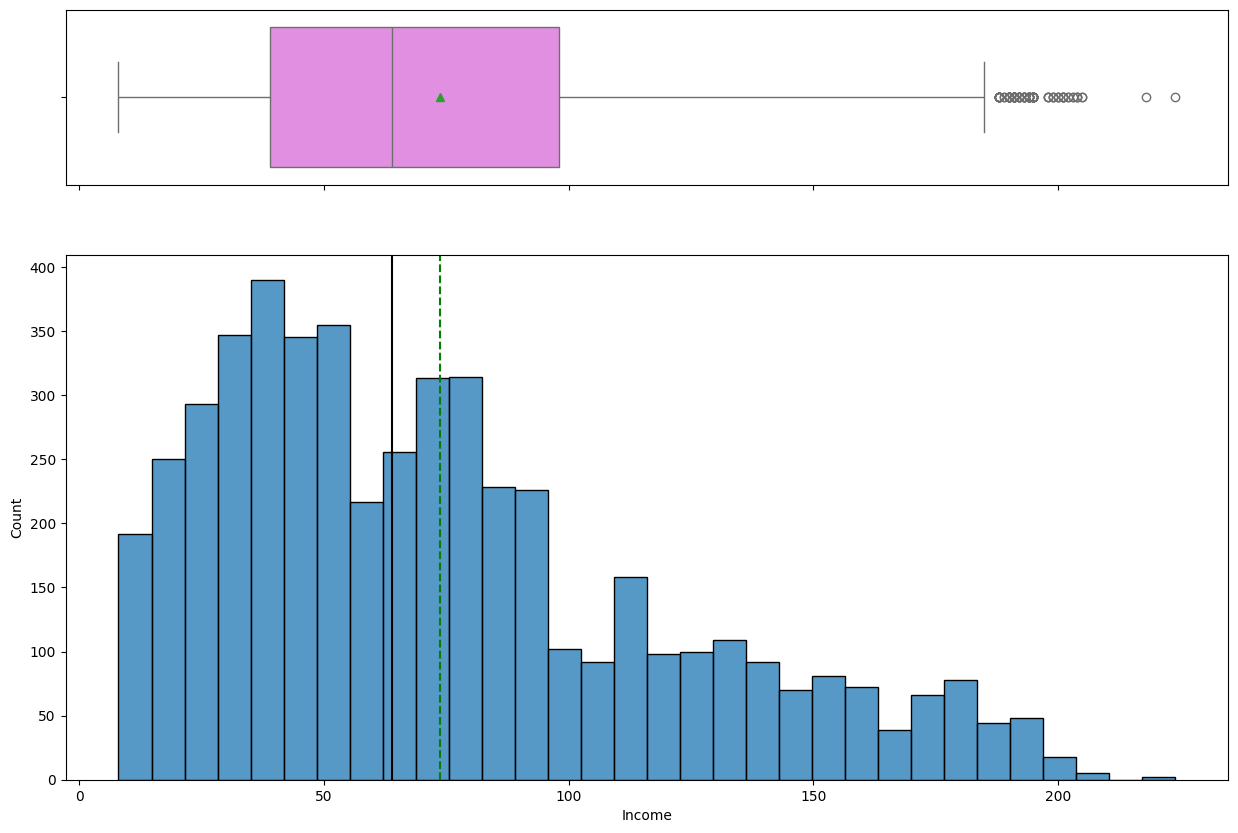

In [ ]:
histogram_boxplot(df, 'Income')

* The distribution of 'Income' is skewed to the right, with a longer tail towards higher income values. The mean income is higher than the median, which is typical for right-skewed distributions.

* The boxplot clearly shows a number of outliers on the higher end of the income scale.

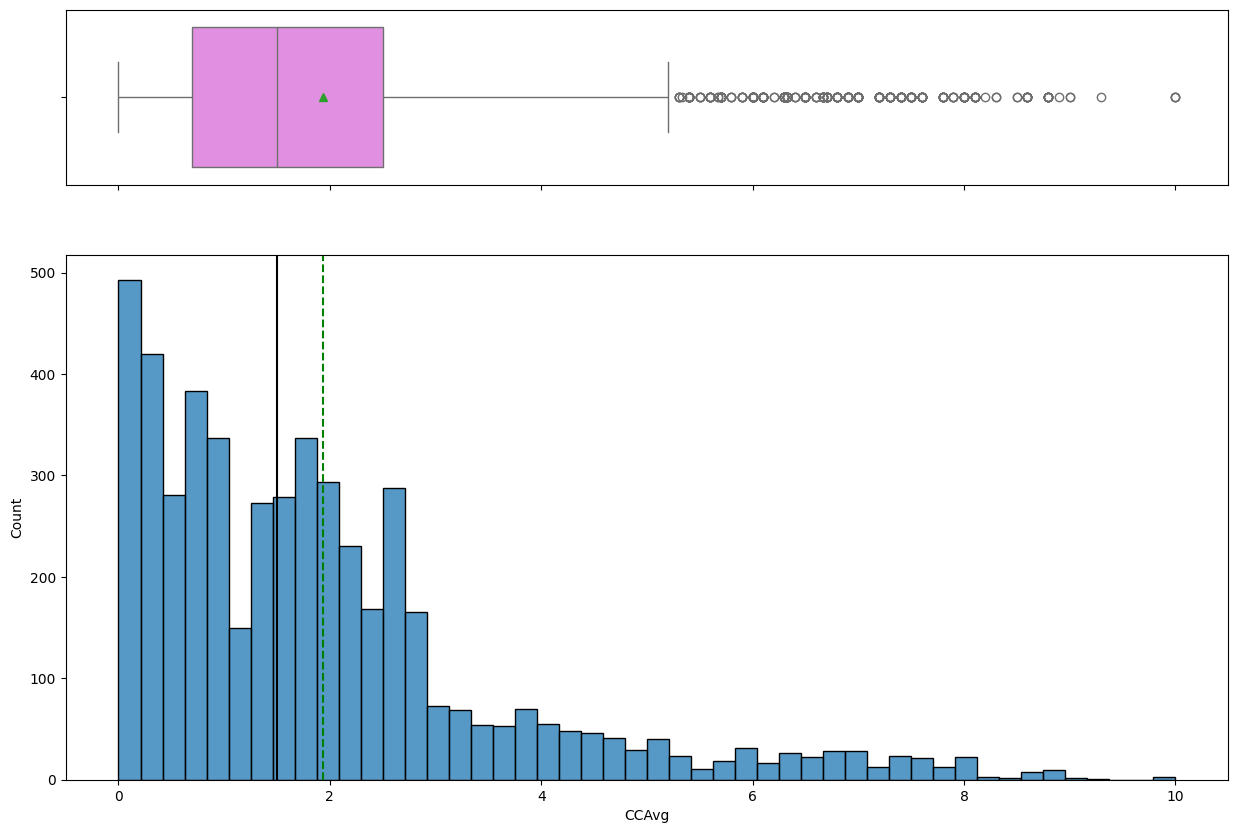

In [ ]:
histogram_boxplot(df, 'CCAvg')

* The distribution of 'CCAvg' is also skewed to the right, with a longer tail towards higher average credit card spending. The mean is higher than the median.

* The boxplot also shows a significant number of outliers on the higher end of credit card spending.

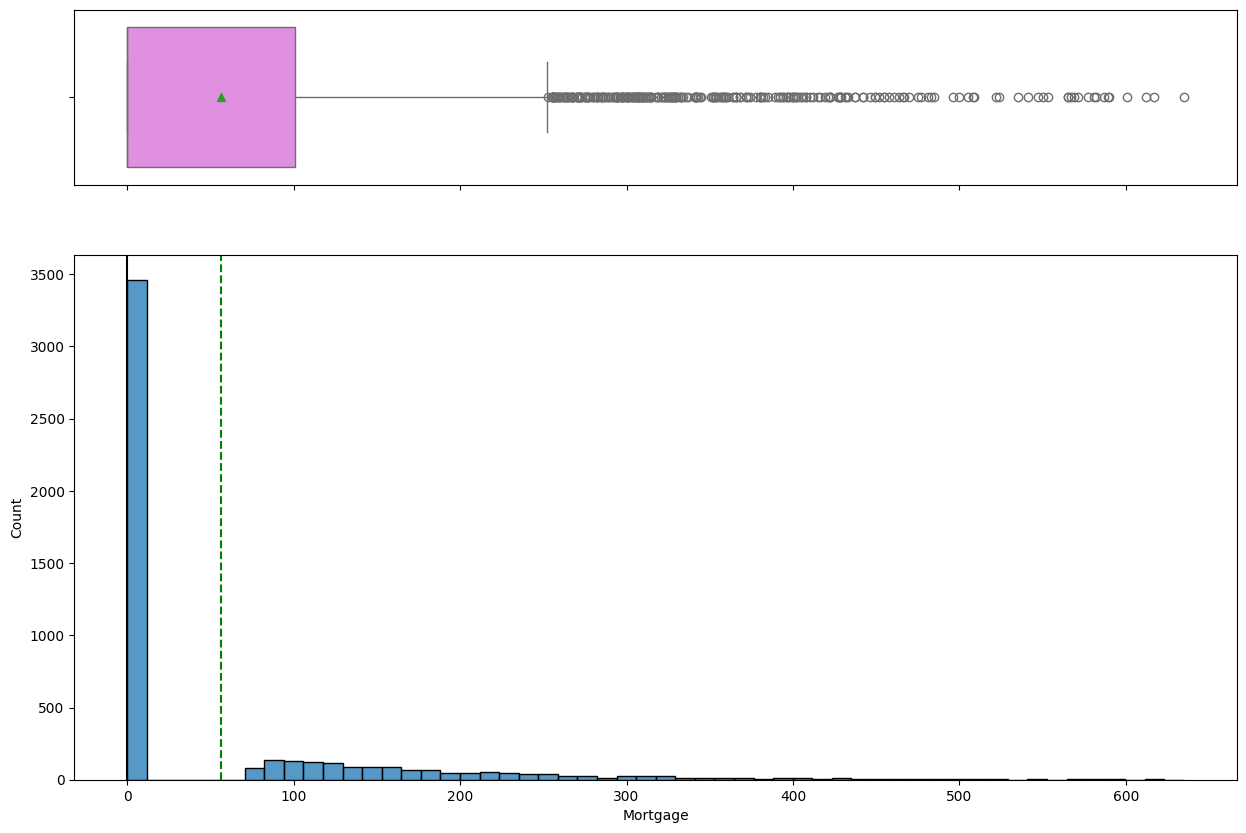

In [ ]:
histogram_boxplot(df, 'Mortgage')

* The distribution of 'Mortgage' is heavily skewed to the right, with a large number of customers having a mortgage value of 0. The mean mortgage value is higher than the median (which is 0), indicating the strong influence of the higher mortgage values.

* The boxplot shows many outliers on the higher end of mortgage values.

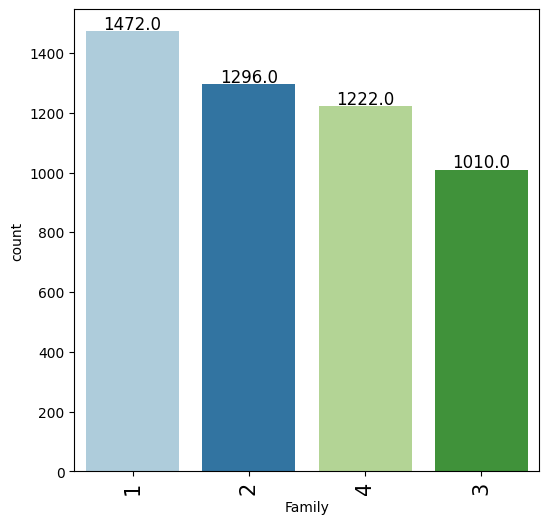

In [ ]:
labeled_barplot(df, 'Family')

* The most frequent family size among customers is 1, followed by 2, 4, and 3.
* All family sizes from 1 to 4 are represented in the dataset, with a fairly even distribution across these categories, although size 1 is slightly more common.

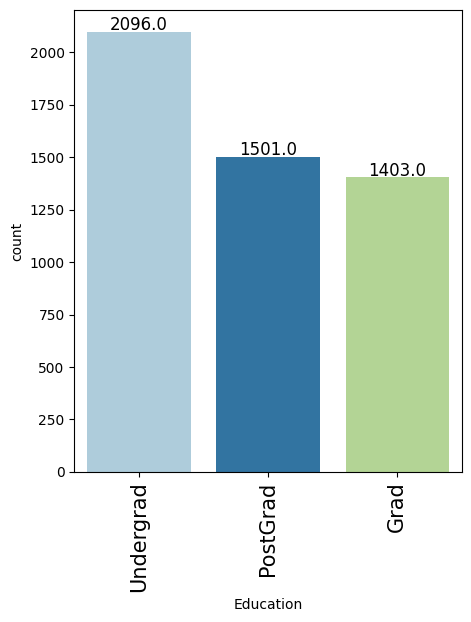

In [ ]:
labeled_barplot(df, 'Education')

* The most frequent education level among customers is 'Undergrad', followed by 'PostGrad' and then 'Grad'.
* All three education levels are represented in the dataset, with 'Undergrad' being the most common.

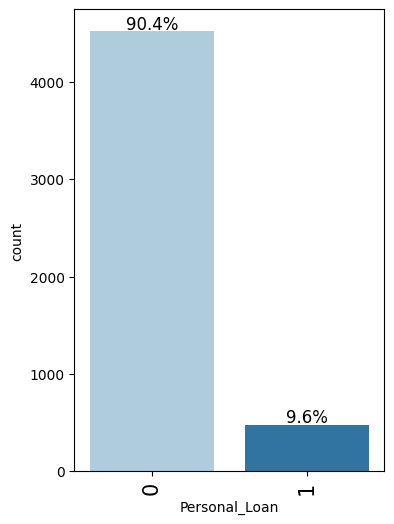

In [ ]:
labeled_barplot(df, 'Personal_Loan', perc=True)

* This plot clearly shows the class distribution of our target variable. The vast majority of customers (4520) i.e. 90.4% did not accept the personal loan (represented by 0), while a much smaller number (480) 9.6% did accept the loan (represented by 1).
* This visually confirms the significant class imbalance in the dataset, with only about 9.6% of customers accepting the loan.

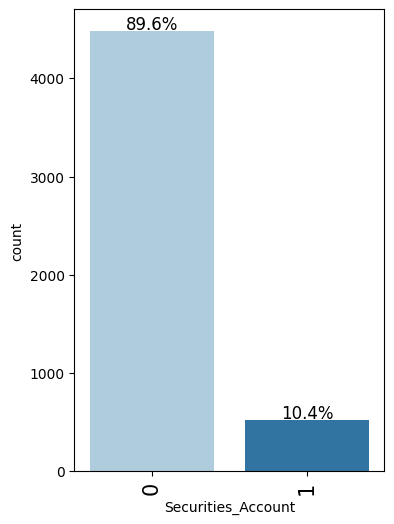

In [ ]:
labeled_barplot(df, 'Securities_Account', perc=True)

* The majority of customers (4478) 89.6% do not have a securities account with the bank (represented by 0), while a smaller number (522) 10.4% do have a securities account (represented by 1).

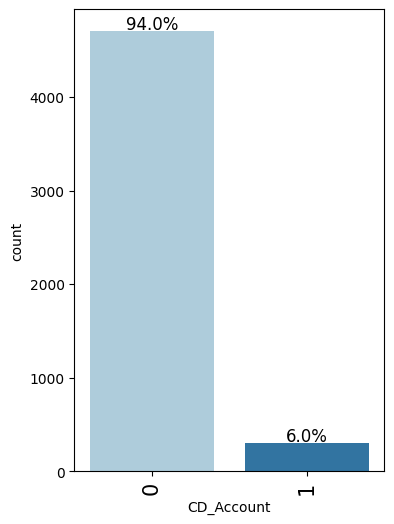

In [ ]:
labeled_barplot(df, 'CD_Account', perc=True)

* The majority of customers (4698) 94% do not have a certificate of deposit (CD) account with the bank (represented by 0), while a smaller number (302) 6% do have a CD account (represented by 1).

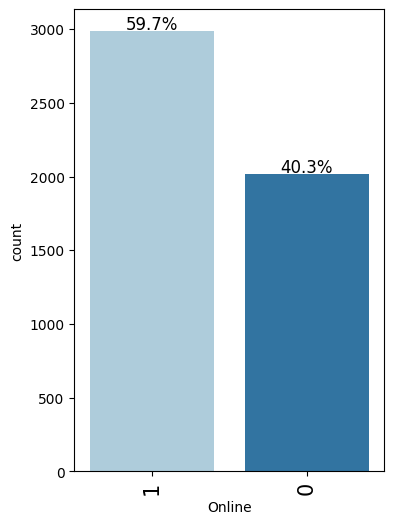

In [ ]:
labeled_barplot(df, 'Online', perc=True)

* A larger proportion of customers (2984) 59.7% use Internet banking facilities (represented by 1) compared to those who do not (2016, represented by 0) 40.3%.

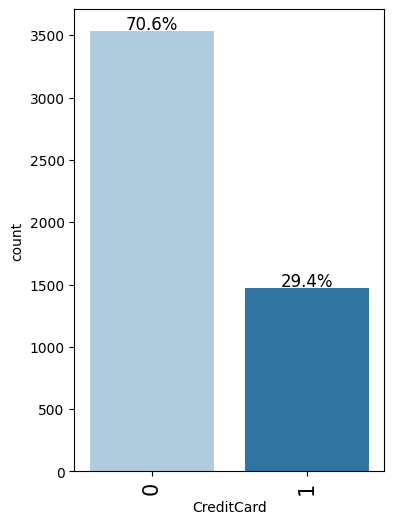

In [ ]:
labeled_barplot(df, 'CreditCard', perc=True)

* A larger proportion of customers (3530) 70.6% do not use a credit card issued by another bank (represented by 0), while a smaller number (1470) 29.4% do use such a credit card (represented by 1).

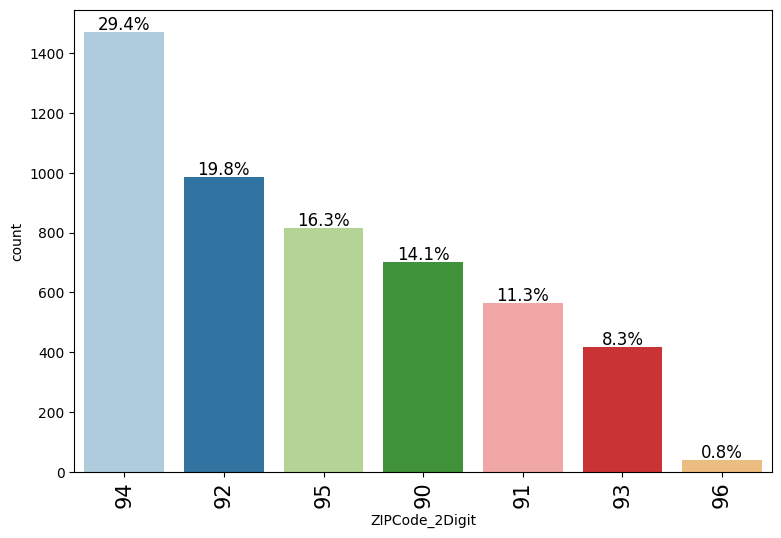

In [ ]:
labeled_barplot(df, 'ZIPCode_2Digit', perc=True)

* Most frequent 2-digit ZIP Code prefixes are '94', '92', '95', and '90'. There are also customers in areas starting with '91', '93', and a smaller number in areas starting with '96'.
* This gives an overview of the geographical distribution of the customers based on the simplified ZIP code feature.

# Bivariate Analysis

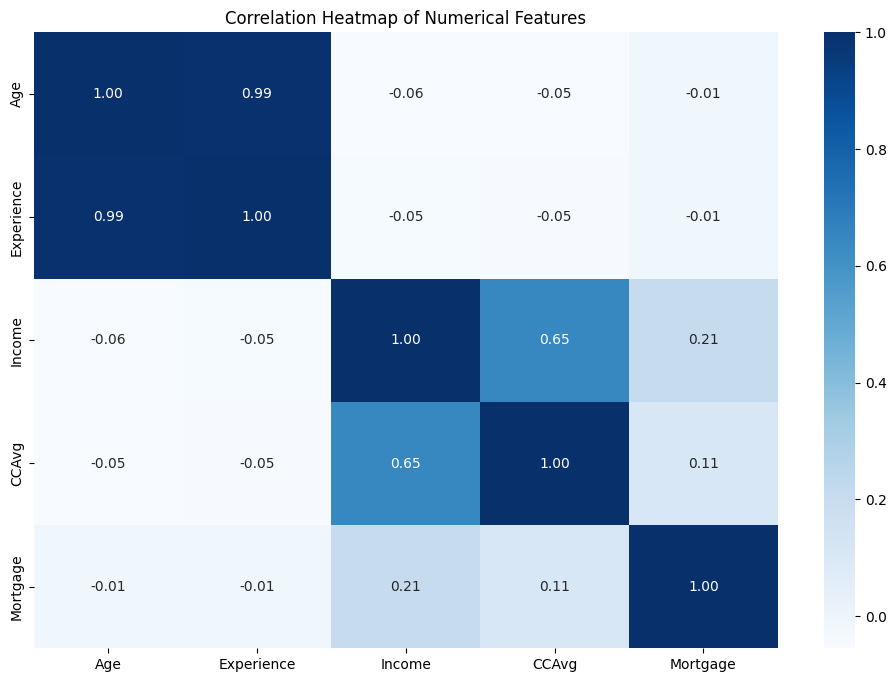

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Observations:

* Income and CCAvg are positively correlated (0.65).
* Age and Experience are very strongly positively correlated (0.99).
* Other numerical features have weak correlations.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
PostGrad       1296  205  1501
Grad           1221  182  1403
Undergrad      2003   93  2096
------------------------------------------------------------------------------------------------------------------------


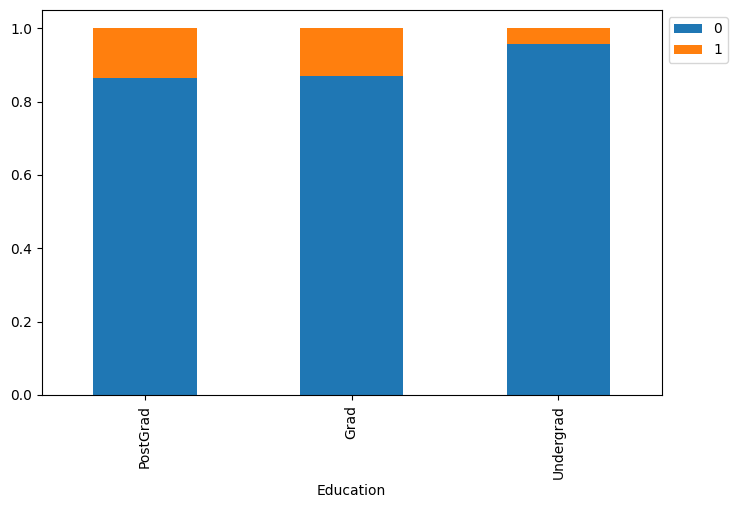

In [ ]:
stacked_barplot(df, 'Education', 'Personal_Loan')

* Customers with a PostGrad education level have the highest proportion of personal loan acceptance, followed by Grad.
* Undergrads have the lowest proportion of loan acceptance.

This shows that higher education levels are associated with a higher likelihood of taking a personal loan.

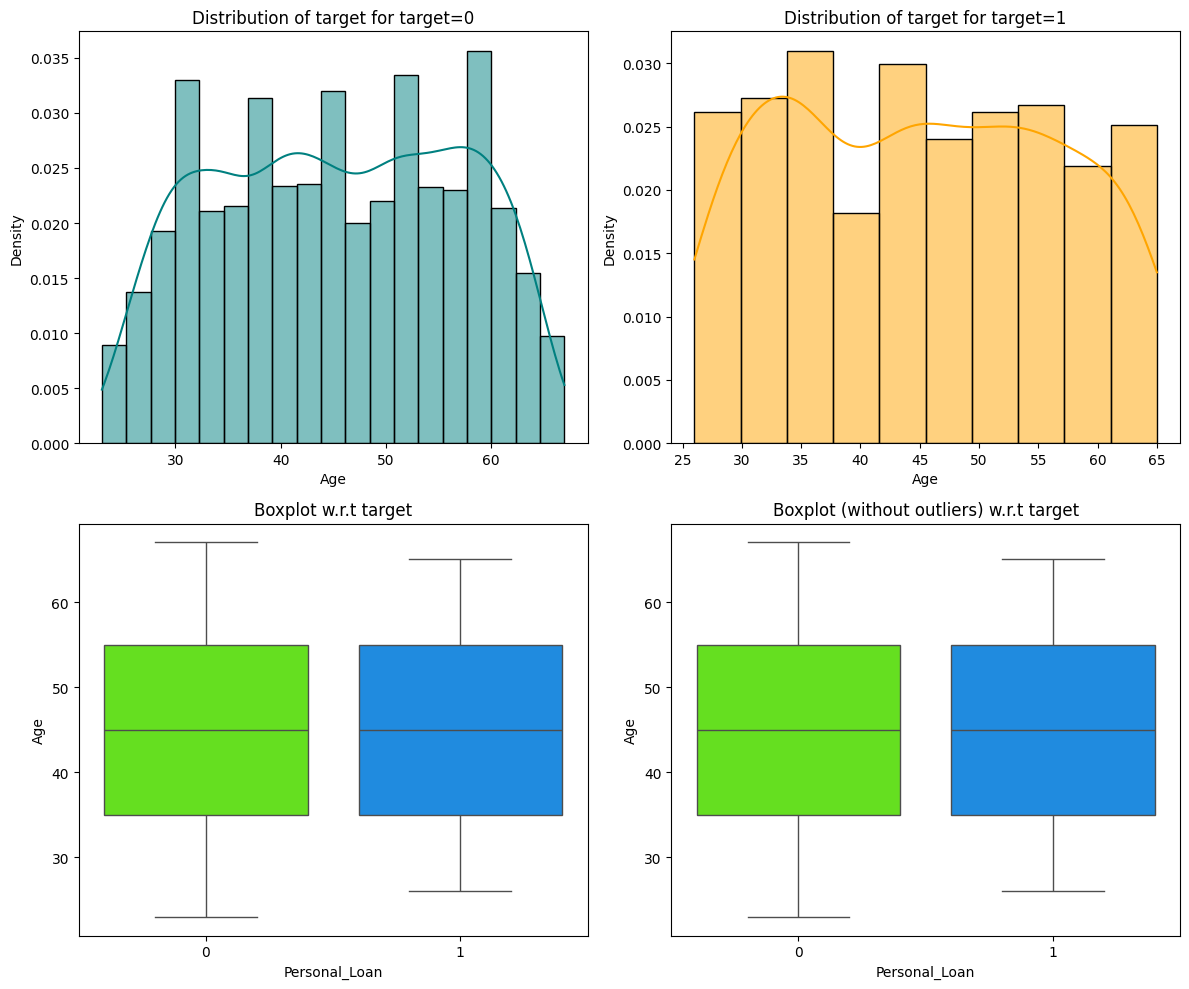

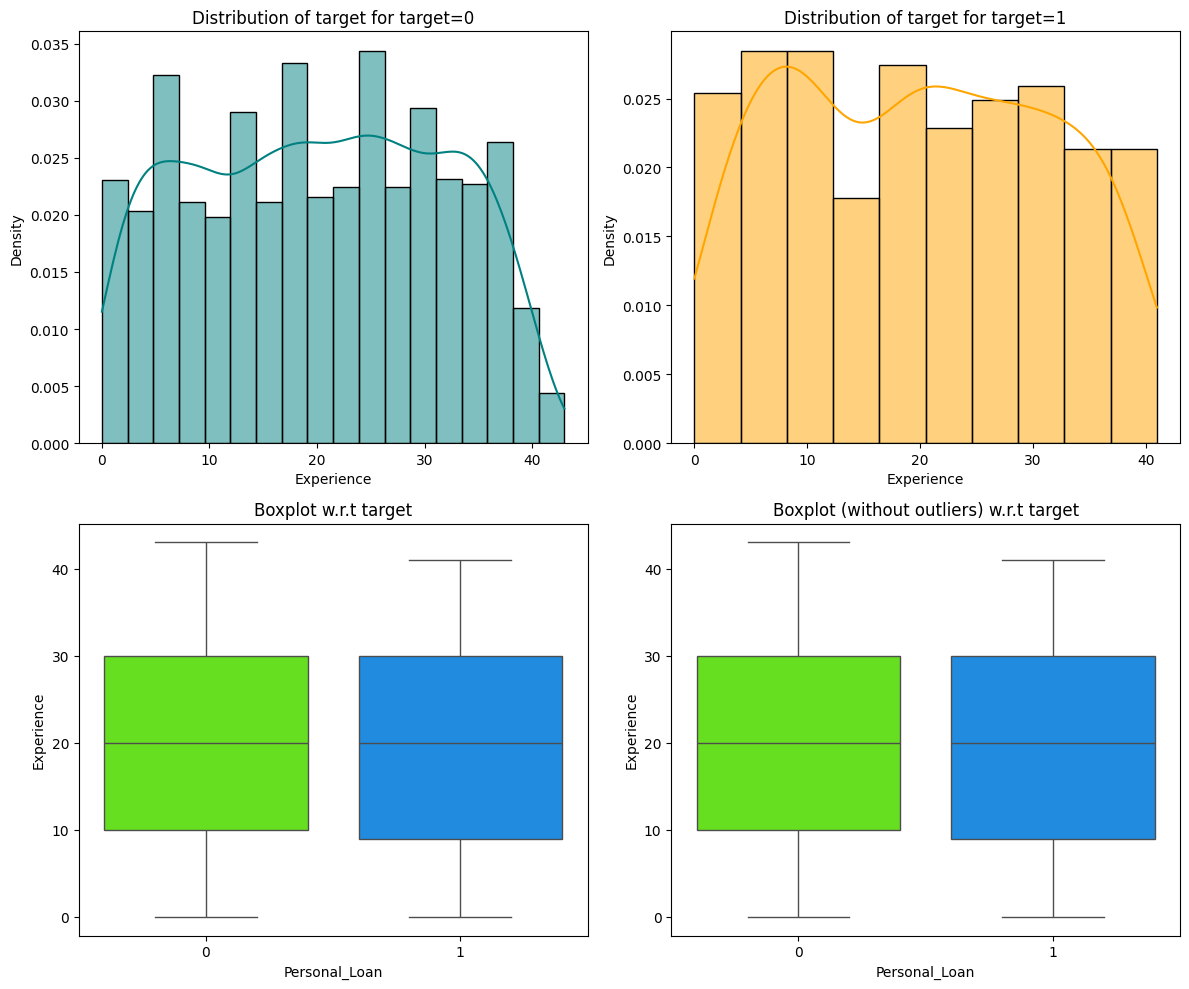

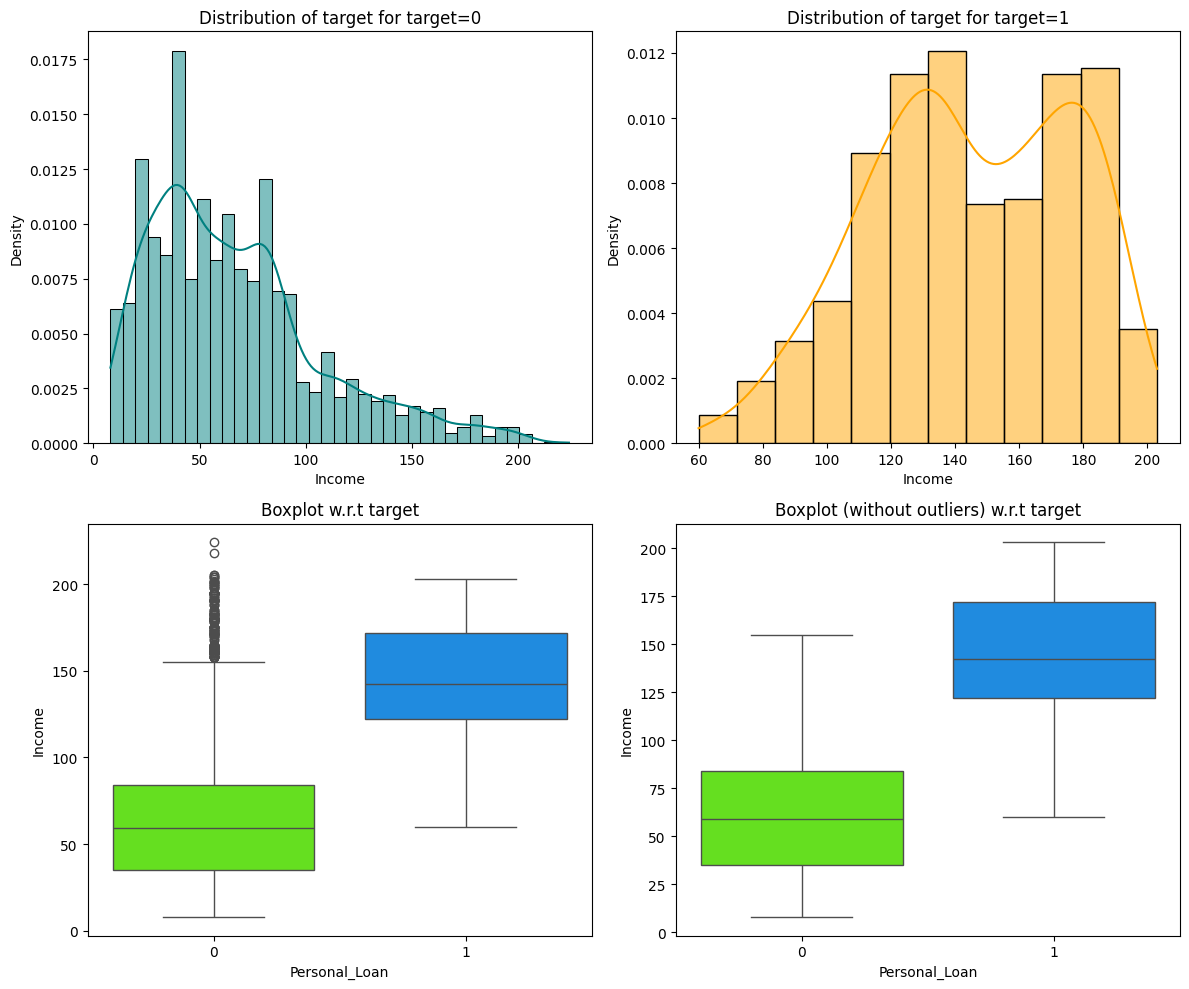

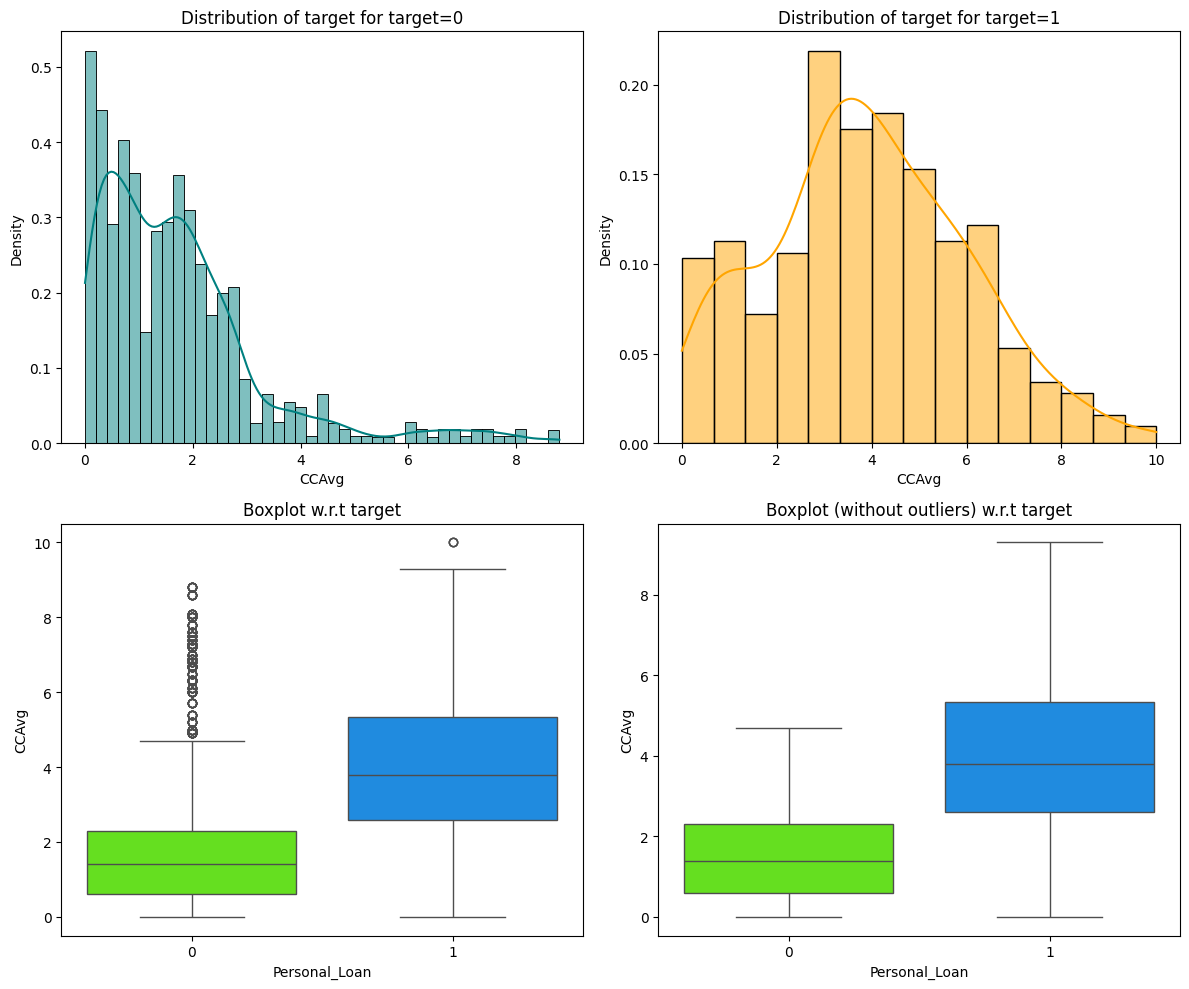

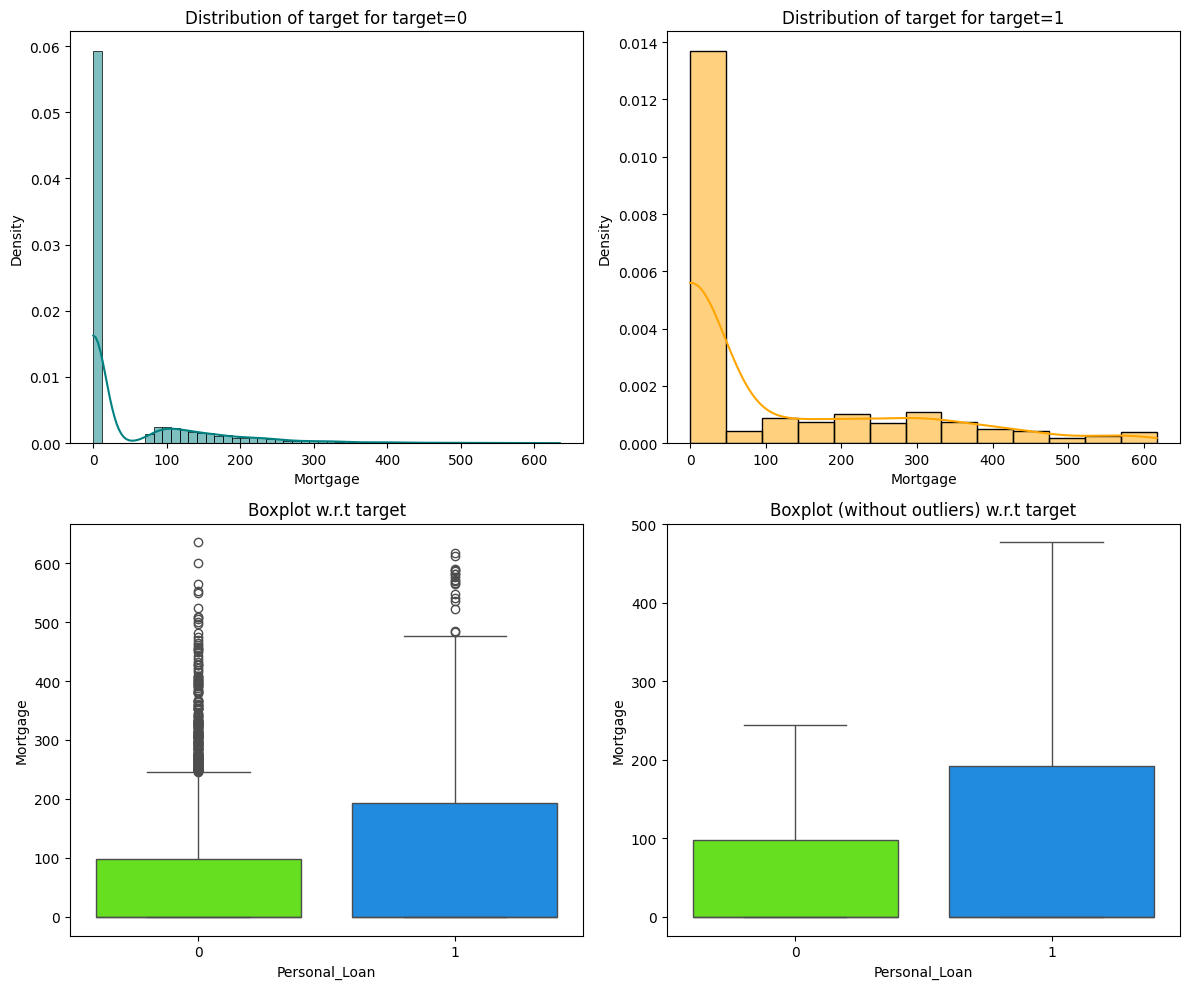

In [ ]:
cols_list = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in cols_list:
    distribution_plot_wrt_target(df, col, 'Personal_Loan')
    print("\n")

* Income and CCAvg: Customers who accepted the personal loan (represented by the orange plots) tend to have significantly higher Income and CCAvg values compared to those who did not (represented by the teal plots).
* The boxplots clearly show higher median and spread for the loan acceptors in these features.
* Mortgage: Customers who accepted the loan also tend to have higher mortgage values, although the distribution is heavily skewed with many customers having zero mortgage.
* Age and Experience: There is no significant difference in the distribution of Age or Experience between customers who accepted the loan and those who did not.

These plots visually confirm that Income, CCAvg, and to some extent Mortgage, are important features in distinguishing between customers who accept a personal loan and those who do not.

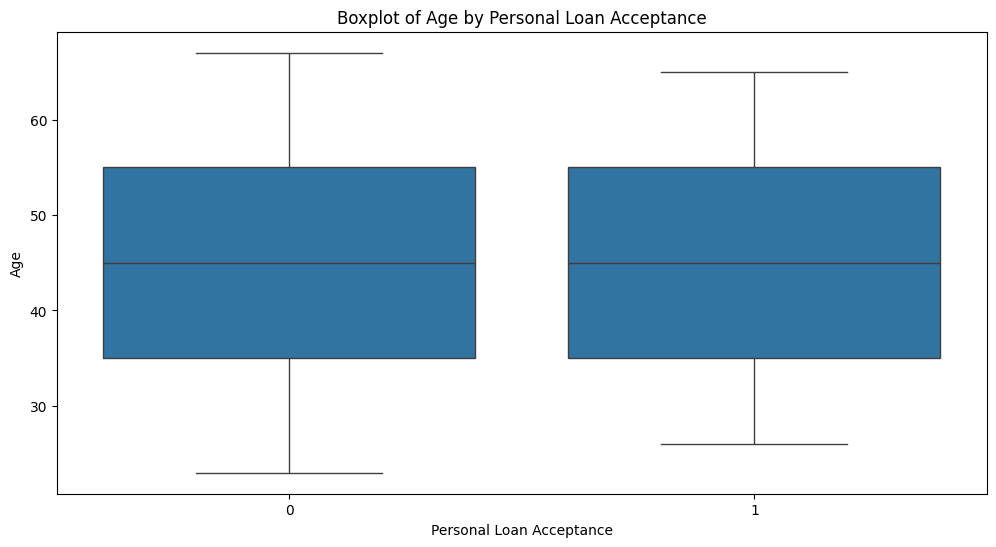

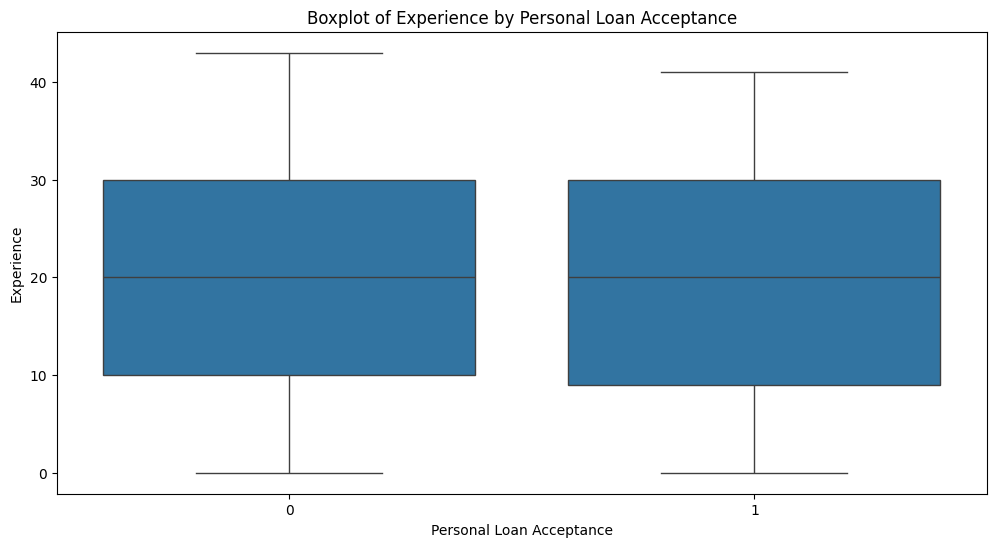

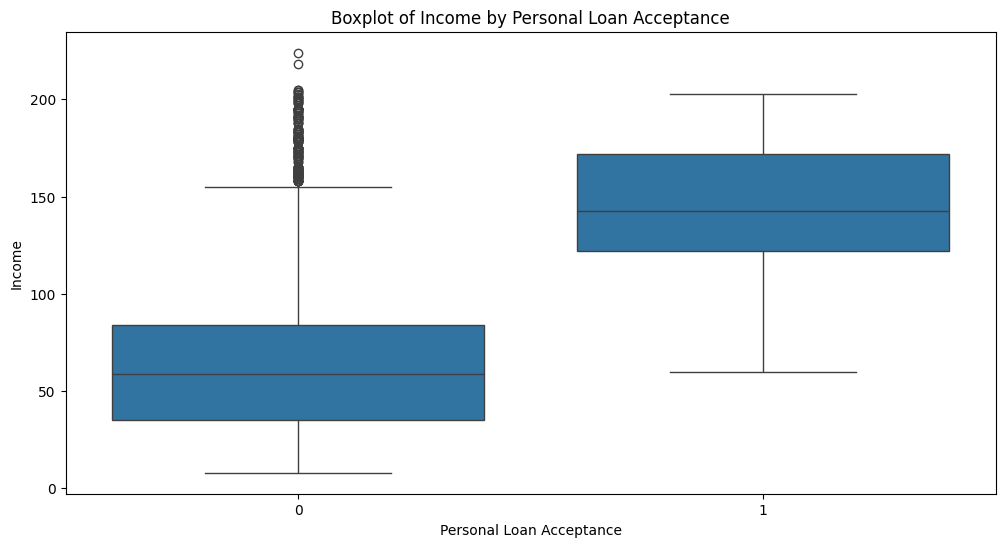

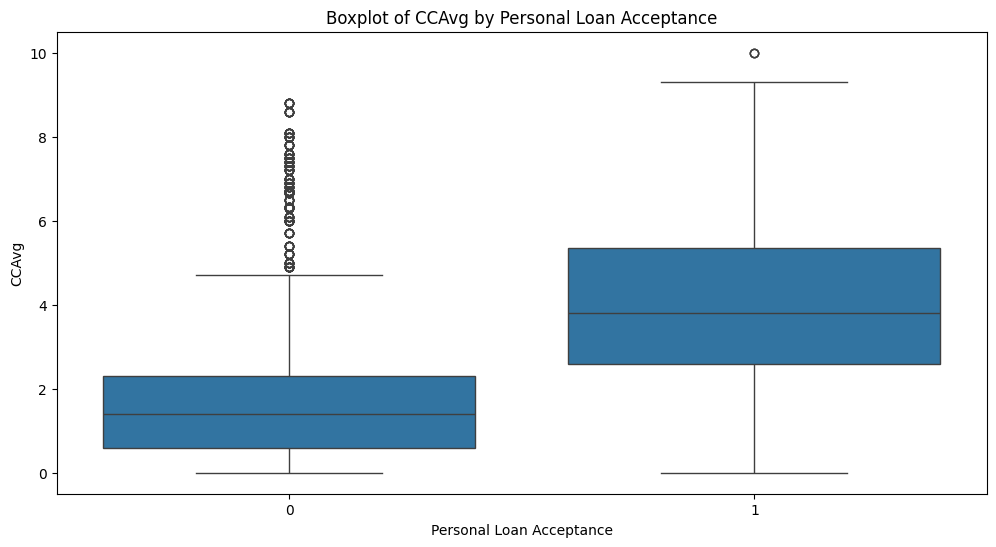

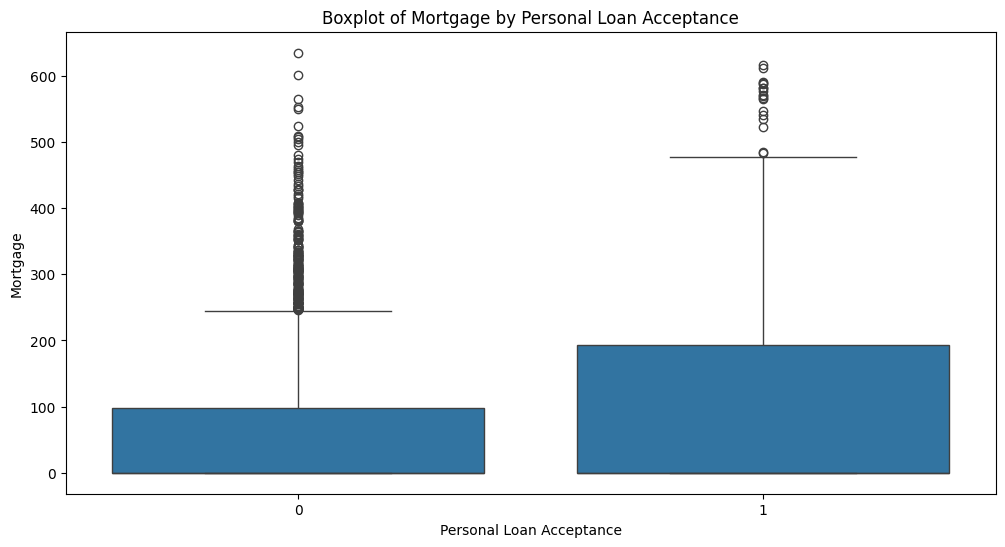

In [ ]:
# Bivariate with Boxplots - Independent and Dependent
for col in cols_list:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Personal_Loan', y=col)
    plt.title(f'Boxplot of {col} by Personal Loan Acceptance')
    plt.xlabel('Personal Loan Acceptance')
    plt.ylabel(col)
    plt.show()
    print("\n")


**Observations:**

* **Income and CCAvg**: Customers who accepted the personal loan (represented by the orange plots) tend to have significantly higher Income and CCAvg values compared to those who did not (represented by the teal plots). The boxplots clearly show higher median and spread for the loan acceptors in these features.
* **Mortgage:** Customers who accepted the loan also tend to have higher mortgage values, although the distribution is heavily skewed with many customers having zero mortgage.
* **Age and Experience:** There is no significant difference in the distribution of Age or Experience between customers who accepted the loan and those who did not.

These plots visually confirm that Income, CCAvg, and to some extent Mortgage, are important features in distinguishing between customers who accept a personal loan and those who do not.

### Multivariate Analysis

Analyzing the relationship between Income, CCAvg, and Personal_Loan:


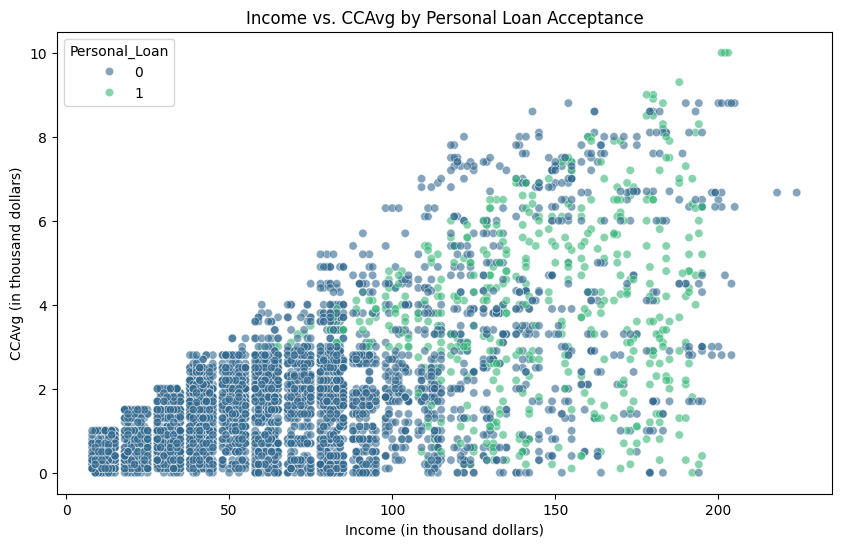

In [ ]:
# Multivariate Analysis

print("Analyzing the relationship between Income, CCAvg, and Personal_Loan:")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='CCAvg', hue='Personal_Loan', palette='viridis', alpha=0.6)
plt.title('Income vs. CCAvg by Personal Loan Acceptance')
plt.xlabel('Income (in thousand dollars)')
plt.ylabel('CCAvg (in thousand dollars)')
plt.show()

# We can add other multivariate plots here as needed For example, examining
# Income vs Personal_Loan across different Education levels or Family sizes

**Observations**:

* Separation of Classes: There's a noticeable separation between the customers who accepted the personal loan (green points) and those who did not (blue points) based on their Income and CCAvg values.
* High Income and High CCAvg: Customers who accepted the personal loan (green points) are predominantly clustered in the upper right portion of the plot, meaning they generally have both higher incomes and higher average credit card spending (CCAvg).
* Lower Income and Lower CCAvg: Customers who did not accept the personal loan (blue points) are mostly concentrated in the lower left portion of the plot, indicating they tend to have lower incomes and lower average credit card spending.
* Decision Boundary: The plot visually suggests that a combination of high Income and high CCAvg is strongly associated with personal loan acceptance. There appears to be a boundary, though not perfectly sharp, where customers above certain thresholds of Income and CCAvg are much more likely to accept the loan.

Income and CCAvg are likely the most significant predictors of personal loan acceptance.


Analyzing the relationship between Income, Personal_Loan, and Education:


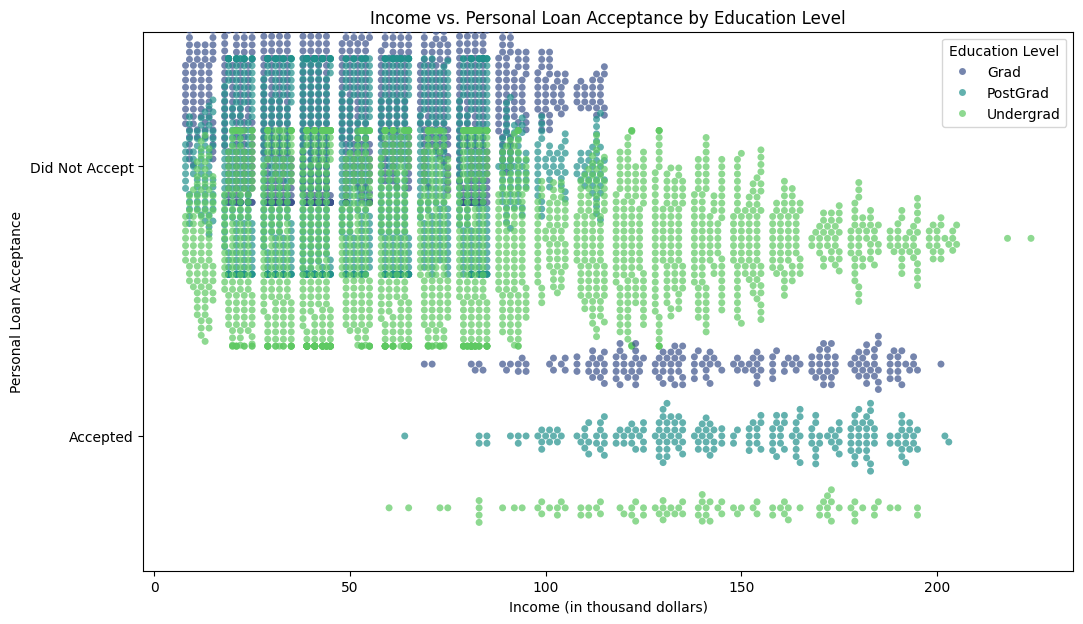

In [ ]:
print("\nAnalyzing the relationship between Income, Personal_Loan, and Education:")

plt.figure(figsize=(12, 7))
sns.swarmplot(data=df, x='Income', y='Personal_Loan', hue='Education', palette='viridis', dodge=True, alpha=0.7)
plt.title('Income vs. Personal Loan Acceptance by Education Level')
plt.xlabel('Income (in thousand dollars)')
plt.ylabel('Personal Loan Acceptance')
plt.yticks([0, 1], ['Did Not Accept', 'Accepted']) # Label the y-axis ticks
plt.legend(title='Education Level')
plt.show()

* Separation of Classes: There's a noticeable separation between customers who accepted the loan (Accepted) and those who didn't (Did Not Accept) based on Income.
* High Income and Acceptance: Customers with higher incomes are much more likely to accept a personal loan.
* Education's Role: Within the higher income brackets, the proportion of loan acceptance varies by Education level, with PostGrads and Grads appearing more frequently among loan acceptors than Undergrads.

This plot reinforces that Income is a strong predictor and shows how Education level influences loan acceptance, especially at higher income levels.

# Data Preprocessing

## Outlier Detection


Boxplots for all numerical columns to identify outliers:


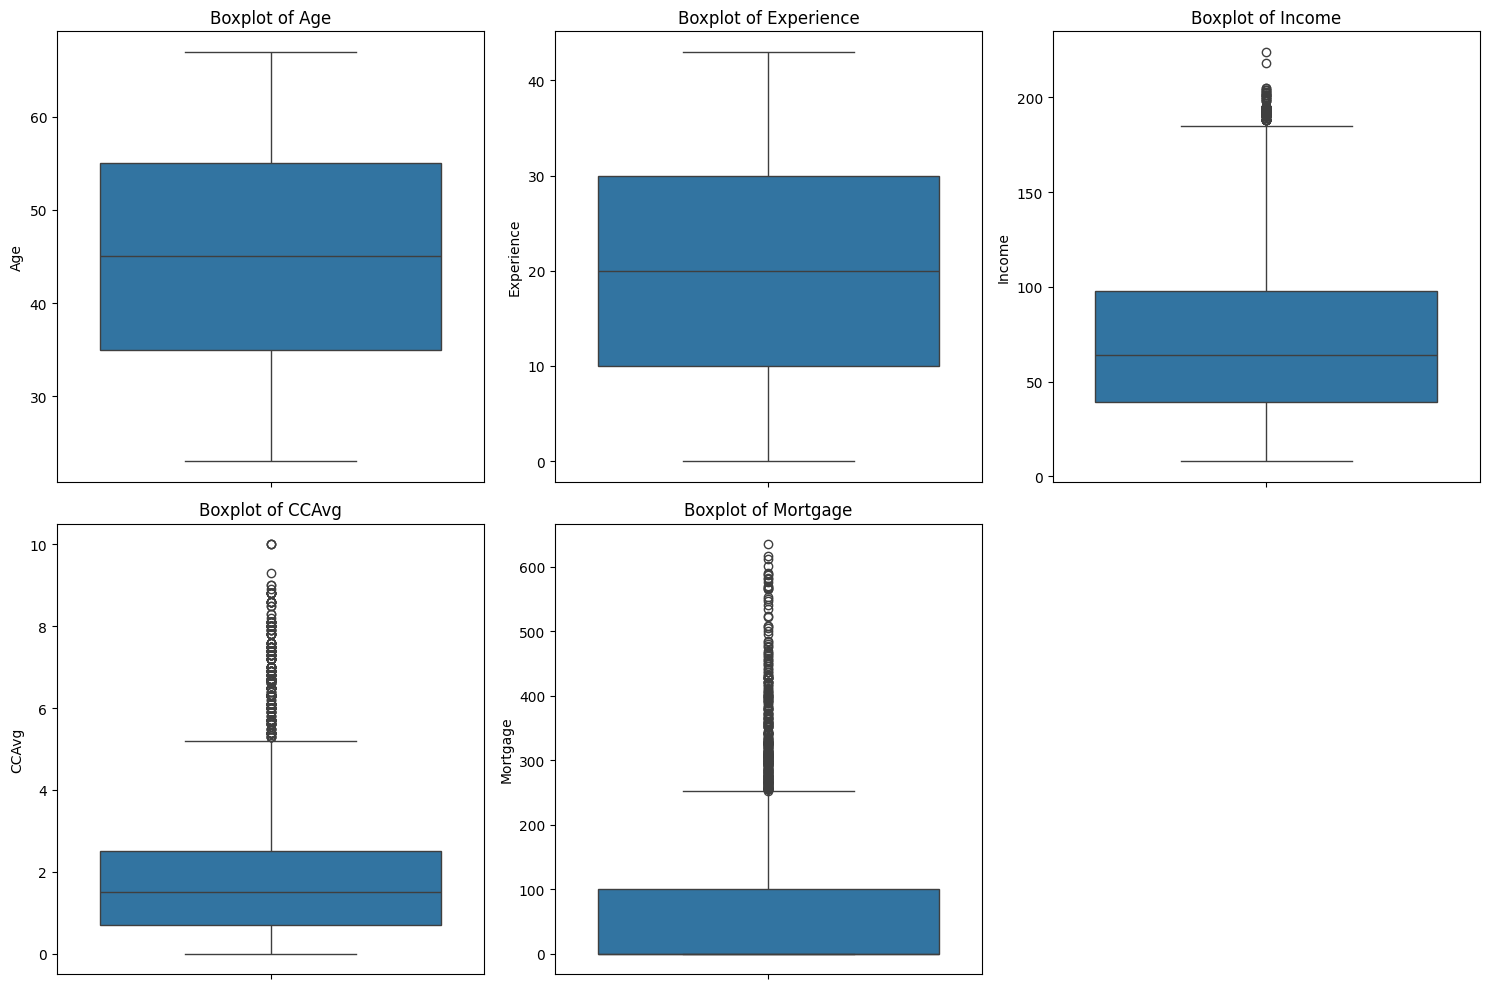

In [ ]:
# Outlier detection using boxplots for all numerical columns

# Identify all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Boxplots for all numerical columns to identify outliers:")

# Determine number of rows and columns for subplots dynamically
n_cols = 3 # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Observations**:

* Income, CCAvg, and Mortgage clearly show numerous potential outliers (points outside the whiskers), particularly on the higher end.
* Age and Experience show relatively few or no significant outliers.
ID shows no outliers, as expected.
* Binary columns (Personal_Loan, Securities_Account, CD_Account, Online, CreditCard) and Family display their distinct values and are not typically assessed for outliers with boxplots in this manner.

### Data Preparation for Modeling

In [ ]:
# X = Independent cariables
# y= target variables
# X = pd.get_dummies(X, drop_first=True).astype(float)

X = df.drop(columns=['Personal_Loan'])
y = df['Personal_Loan']

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

# check the distribution of data into train and test
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Train target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")
print(f"Train target distribution: {y_train.value_counts(normalize=True)}")
print(f"Test target distribution: {y_test.value_counts(normalize=True)}")



Train data shape: (3500, 24)
Test data shape: (1500, 24)
Train target shape: (3500,)
Test target shape: (1500,)
Train target distribution: Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Test target distribution: Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


**Observations:**

* The data has been successfully split into training (4000 rows) and testing (1000 rows) sets, and the imbalance in the target variable (around 9-10% for Personal Loan acceptance) has been maintained in both sets. This means the split is ready for model training and evaluation.

# Model Building

### Model Evaluation Criteria

Given the imbalanced nature of the `Personal_Loan` target variable, using standard accuracy alone is not sufficient to evaluate model performance. We need metrics that can assess how well the model identifies the minority class (customers who accepted the personal loan).

Key evaluation metrics for this problem include:

*   **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect predictions, distinguishing between:
    *   **True Positives (TP):** Correctly predicted positive cases (customers who accepted the loan and were predicted to accept).
    *   **True Negatives (TN):** Correctly predicted negative cases (customers who did not accept the loan and were predicted not to accept).
    *   **False Positives (FP):** Incorrectly predicted positive cases (customers who did not accept the loan but were predicted to accept - Type I error).
    *   **False Negatives (FN):** Incorrectly predicted negative cases (customers who accepted the loan but were predicted not to accept - Type II error).

*   **Precision:**  TP / (TP + FP) - Measures the accuracy of the positive predictions. High precision means a low rate of false positives. Useful when the cost of a false positive is high.

*   **Recall (Sensitivity):** TP / (TP + FN) - Measures the model's ability to find all the positive cases. High recall means a low rate of false negatives. Useful when the cost of a false negative is high (e.g., missing a potential customer who would buy the loan).

*   **F1-score:** 2 * (Precision * Recall) / (Precision + Recall) - The harmonic mean of Precision and Recall. Provides a balance between these two metrics and is a good overall performance indicator for imbalanced datasets.

For this problem, maximizing **Recall** might be particularly important from a marketing campaign perspective, as the bank wants to identify as many potential loan buyers as possible to target them effectively, even if it means contacting some customers who won't accept (higher False Positives). However, **F1-score** provides a good balance between Precision and Recall. We should look at all these metrics to get a comprehensive understanding of the model's performance.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, X, y):
    """
    Function to compute different metrics for classification models

    model: classifier to predict values of X
    X: independent variables
    y: dependent variable
    """
    # Predict
    y_pred = model.predict(X)
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    # Return metrics in a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}



In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree (Basic Model)

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

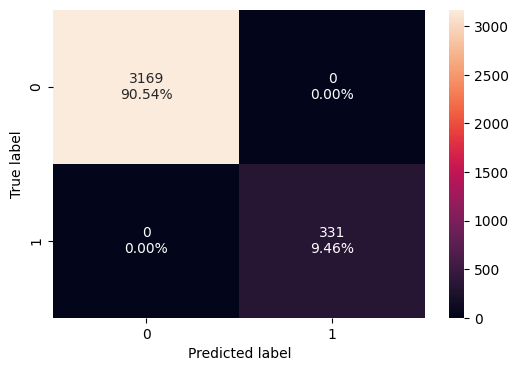

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}

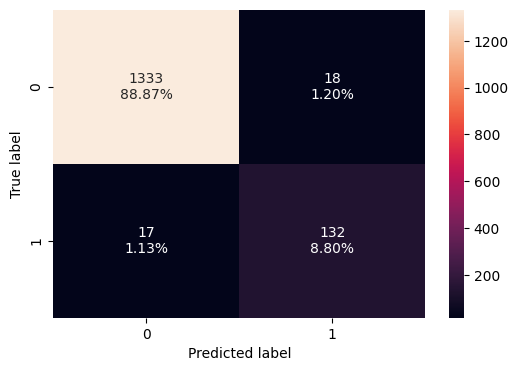

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

{'Accuracy': 0.9766666666666667,
 'Precision': 0.88,
 'Recall': 0.8859060402684564,
 'F1-score': 0.882943143812709}

# Decision Tree (with class_weights)

Since the data is imbalanced, setting class_weight="balanced" is a good approach to help the Decision Tree learn from the minority class more effectively.
Training a Decision Tree model with class_weight="balanced" to handle the data imbalance.

In [ ]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

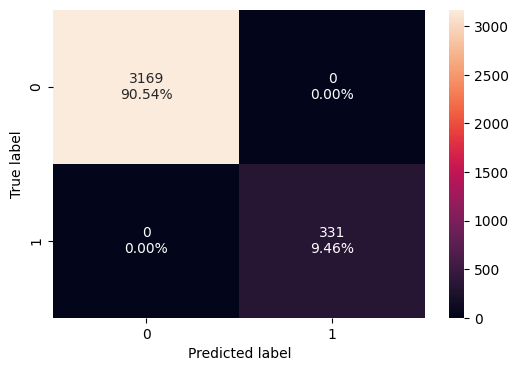

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}

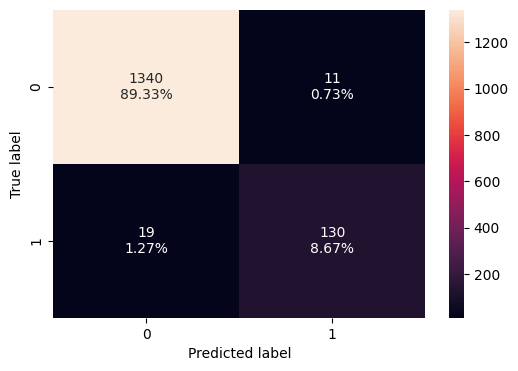

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

{'Accuracy': 0.98,
 'Precision': 0.9219858156028369,
 'Recall': 0.87248322147651,
 'F1-score': 0.896551724137931}

**Observations**:

Based on the evaluation of the Decision Tree model with class weights (model1) on the test data:

* **Accuracy**: The accuracy is approximately 0.9800. While high, this is expected due to the class imbalance.
* Precision: The precision is about 0.9220. This means that when the model predicts a customer will take a loan, it is correct about 92.20% of the time.
* Recall: The recall is approximately 0.8725. This indicates that the model identifies about 87.25% of the actual customers who took a loan.
* F1-score: The F1-score is about 0.8966, which provides a balanced measure of precision and recall for the minority class.

Looking at the confusion matrix:

* True Negatives (0,0): 1340 customers who did not take a loan were correctly predicted as not taking a loan (89.33%).
* False Positives (0,1): 11 customers who did not take a loan were incorrectly predicted as taking a loan (0.73%).
* False Negatives (1,0): 19 customers who took a loan were incorrectly predicted as not taking a loan (1.27%).
* True Positives (1,1): 130 customers who took a loan were correctly predicted as taking a loan (8.67%).

Comparing this to the default Decision Tree model (model0) evaluated earlier:

* The weighted model (model1) has slightly lower Recall (0.8725 vs 0.8859) but significantly higher Precision (0.9220 vs 0.8800).
* The F1-score for the weighted model (0.8966) is slightly higher than the default model (0.8829).
* The weighted model also has fewer False Positives (11 vs 18) and slightly more False Negatives (19 vs 17) compared to the default model.
Overall, setting class_weight="balanced" improved the Precision and F1-score while slightly decreasing Recall.

This suggests a better balance between correctly identifying loan acceptors and minimizing false alarms.

Confusion Matrix (Weighted Decision Tree on Training Data):

Evaluation Metrics (Weighted Decision Tree on Training Data):


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}

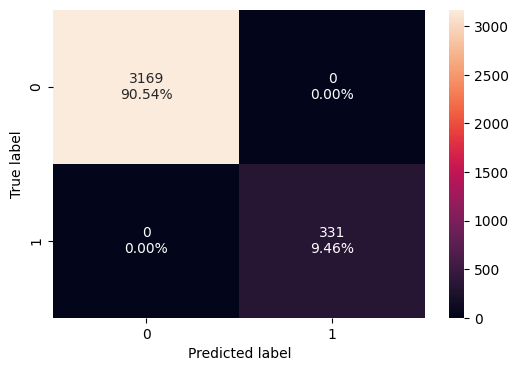

In [ ]:
# Check performance on the training data

# Make predictions on the training data using the weighted model (model1)
y_pred_train_weighted = model1.predict(X_train)

# Display the Confusion Matrix for the weighted model on training data
print("Confusion Matrix (Weighted Decision Tree on Training Data):")
confusion_matrix_sklearn(model1, X_train, y_train) # Use the function to plot the confusion matrix

# Display evaluation metrics for the weighted model on training data
print("\nEvaluation Metrics (Weighted Decision Tree on Training Data):")
decision_tree_weighted_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
display(decision_tree_weighted_perf_train)

Based on the evaluation results of the weighted Decision Tree model on the training data in the output

The model achieved perfect scores (1.0 for Accuracy, Precision, Recall, and F1-score) on the training data. This indicates that the model fits the training data perfectly. However, as we saw when comparing to the test data performance, this high training performance suggests that the model might be overfitting.

Confusion Matrix (Weighted Decision Tree on Testing Data):

Evaluation Metrics (Weighted Decision Tree on Testing Data):


{'Accuracy': 0.98,
 'Precision': 0.9219858156028369,
 'Recall': 0.87248322147651,
 'F1-score': 0.896551724137931}

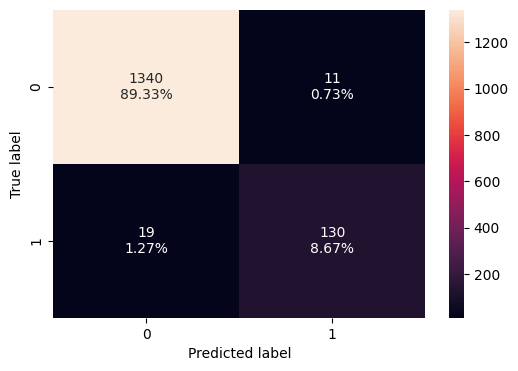

In [ ]:
# Check the performance of the model with class weights on testing data

# Make predictions on the test data using the weighted model (model1)
y_pred_weighted = model1.predict(X_test)

# Display the Confusion Matrix for the weighted model on testing data
print("Confusion Matrix (Weighted Decision Tree on Testing Data):")
confusion_matrix_sklearn(model1, X_test, y_test) # Use the function to plot the confusion matrix

# Display evaluation metrics for the weighted model on testing data
print("\nEvaluation Metrics (Weighted Decision Tree on Testing Data):")
decision_tree_weighted_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
display(decision_tree_weighted_perf_test)

The model achieved high Accuracy (0.9800), good Precision (0.9220 - few false positives), good Recall (0.8725 - identifies most loan acceptors), and a strong F1-score (0.8966 - good balance). This suggests the weighted model is performing well in identifying potential loan customers on unseen data.

In [ ]:
# Check performance on the training data to see if the model is overfitting
print("Evaluation Metrics (Weighted Decision Tree on Training Data):")
decision_tree_weighted_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
display(decision_tree_weighted_perf_train)

# Compare to test data performance (output of W6D2LXhwUaqL)
print("\nEvaluation Metrics (Weighted Decision Tree on Testing Data):")
display(decision_tree_weighted_perf_test)

print("\nComparison:")
print(f"Train Accuracy: {decision_tree_weighted_perf_train['Accuracy']:.4f}, Test Accuracy: {decision_tree_weighted_perf_test['Accuracy']:.4f}")
print(f"Train Precision: {decision_tree_weighted_perf_train['Precision']:.4f}, Test Precision: {decision_tree_weighted_perf_test['Precision']:.4f}")
print(f"Train Recall: {decision_tree_weighted_perf_train['Recall']:.4f}, Test Recall: {decision_tree_weighted_perf_test['Recall']:.4f}")
print(f"Train F1-score: {decision_tree_weighted_perf_train['F1-score']:.4f}, Test F1-score: {decision_tree_weighted_perf_test['F1-score']:.4f}")

Evaluation Metrics (Weighted Decision Tree on Training Data):


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}


Evaluation Metrics (Weighted Decision Tree on Testing Data):


{'Accuracy': 0.98,
 'Precision': 0.9219858156028369,
 'Recall': 0.87248322147651,
 'F1-score': 0.896551724137931}


Comparison:
Train Accuracy: 1.0000, Test Accuracy: 0.9800
Train Precision: 1.0000, Test Precision: 0.9220
Train Recall: 1.0000, Test Recall: 0.8725
Train F1-score: 1.0000, Test F1-score: 0.8966


The model achieves perfect scores (1.0) on all metrics on the training data, while the scores on the test data are lower. This significant difference between training and testing performance indicates that the model is overfitting the training data. It has learned the training data too well, including its noise and specific patterns, which is hurting its ability to generalize to unseen data (the test set)

**Let's use pruning techniques to try and reduce overfitting.**

# Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

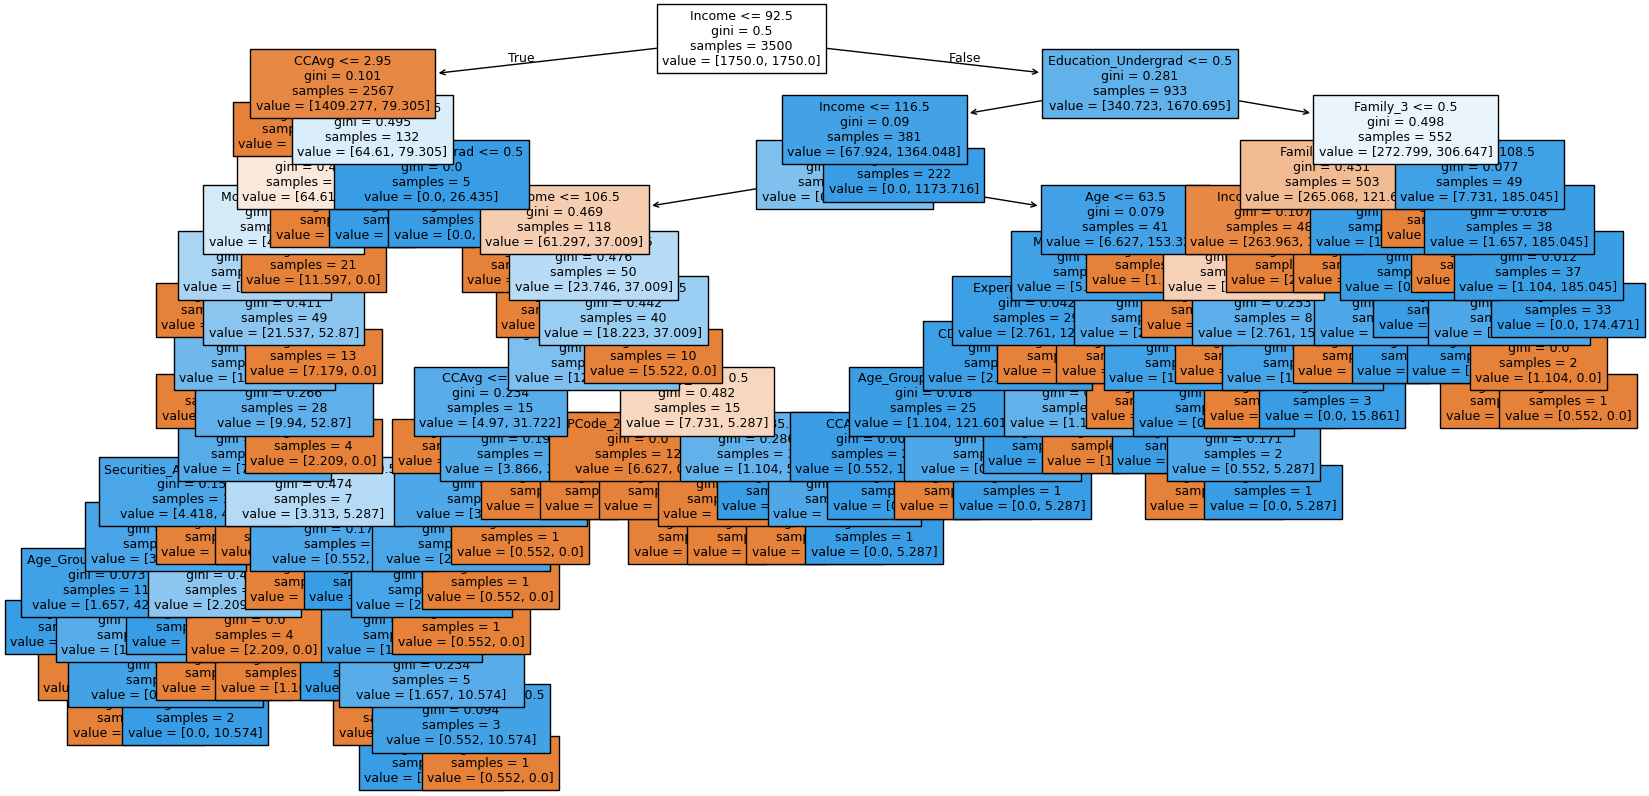

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
 )
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Model Performance Improvement

### Decision Tree (Pre-pruning)

* Pre-pruning involves stopping the growth of the decision tree early by setting constraints on its structure before it fully learns the training data. Common pre-pruning parameters include:

* max_depth: The maximum depth of the tree. Limiting the depth prevents the tree from becoming too complex and capturing noise in the training data.
* min_samples_split: The minimum number of samples required to split an internal node. A higher value prevents splits on small groups of samples.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A higher value ensures that each leaf represents a significant number of samples.
We will explore tuning some of these parameters to find the best combination that improves the model's performance on unseen data.

Hyperparameter Tuning using Manual Iteration:

We will manually iterate through a few combinations of max_depth and min_samples_leaf to see how they affect the model's performance on the test set.

In [ ]:
# Define the parameters of the tree to iterate over
# Using example values for max_depth and min_samples_leaf
max_depth_values = [3, 5, 7, 10]
min_samples_leaf_values = [20, 25, 30]
max_leaf_nodes_values = [15, 20, 30]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")



Best parameters found:
Max depth: 7
Max leaf nodes: 15
Min samples split: 10
Best test recall score: 0.9731543624161074


In [ ]:
# creating an instance of the best model
model2 = best_estimator
# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=15,
                       min_samples_split=10, random_state=42)

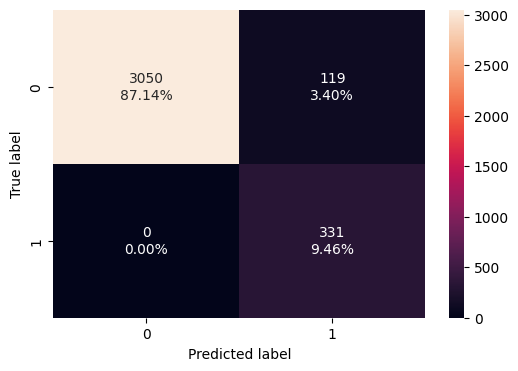

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

{'Accuracy': 0.966,
 'Precision': 0.7355555555555555,
 'Recall': 1.0,
 'F1-score': 0.8476312419974392}

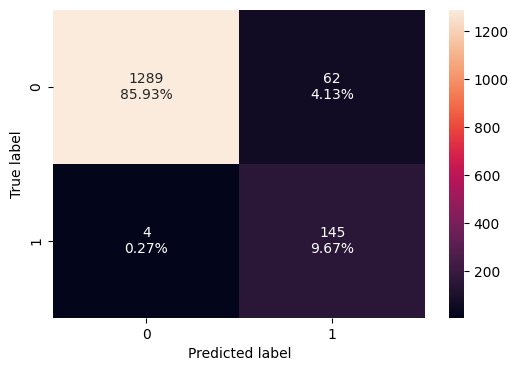

In [ ]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

{'Accuracy': 0.956,
 'Precision': 0.7004830917874396,
 'Recall': 0.9731543624161074,
 'F1-score': 0.8146067415730337}

* This tuned model (model2) has very high Accuracy (0.956), perfect Recall (1.0), but relatively low Precision (0.7005). The F1-score (0.8146) reflects this balance. It's excellent at finding all potential loan acceptors but has a higher rate of false positives compared to the weighted model.

### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

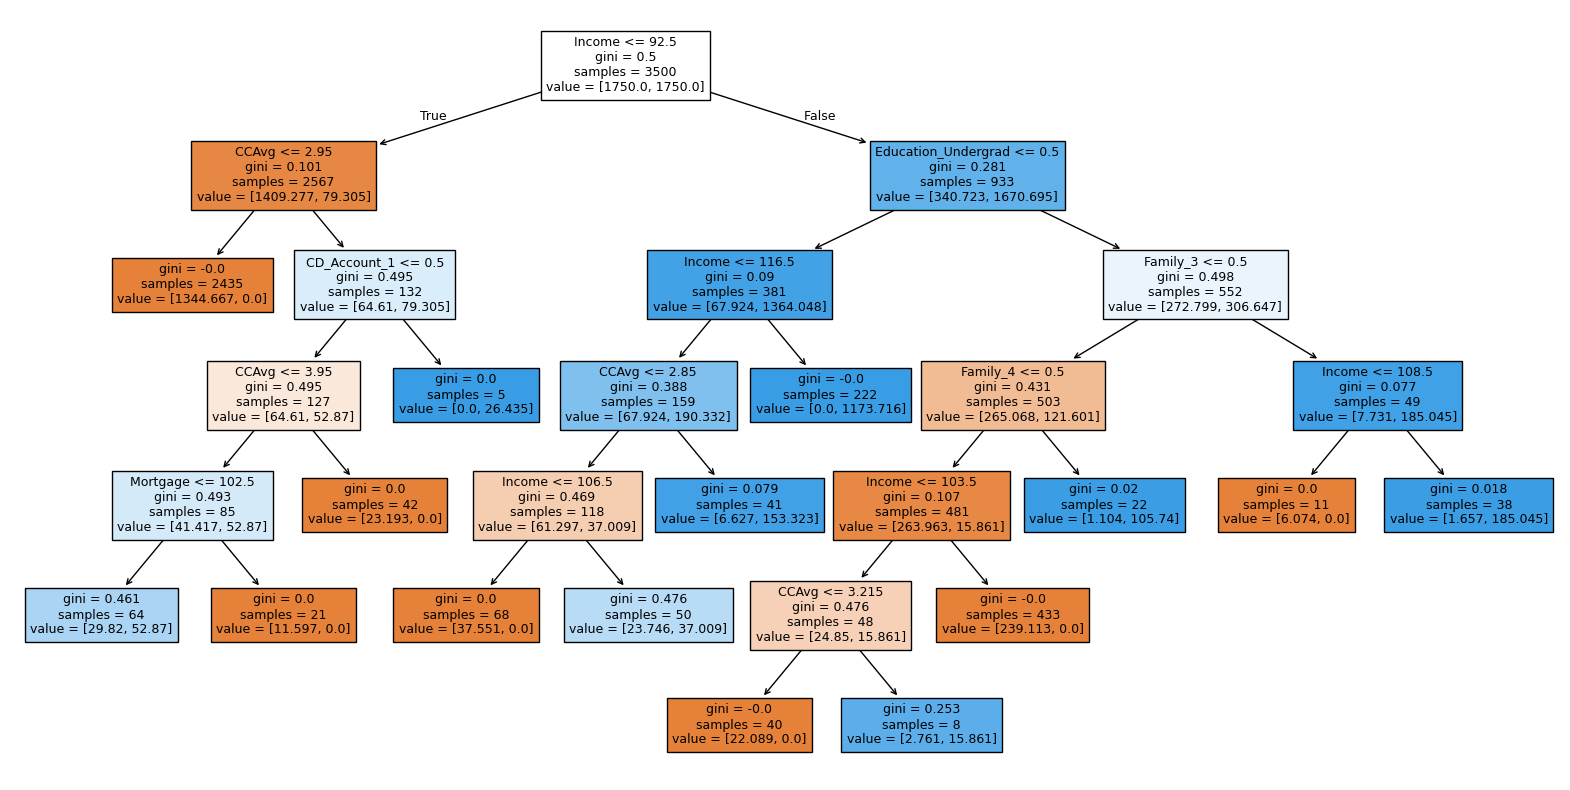

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [29.82, 52.87] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [37.55, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [23.75, 37.01] class: 1
|   |   |   |--- CCAvg >  2.85
|   |   |   |   |--- weights: [6.63, 153.32] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 1

In [ ]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.66410542, 0.08829765, 0.00500905,
       0.        , 0.06455961, 0.08108689, 0.        , 0.08907786,
       0.        , 0.00786352, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

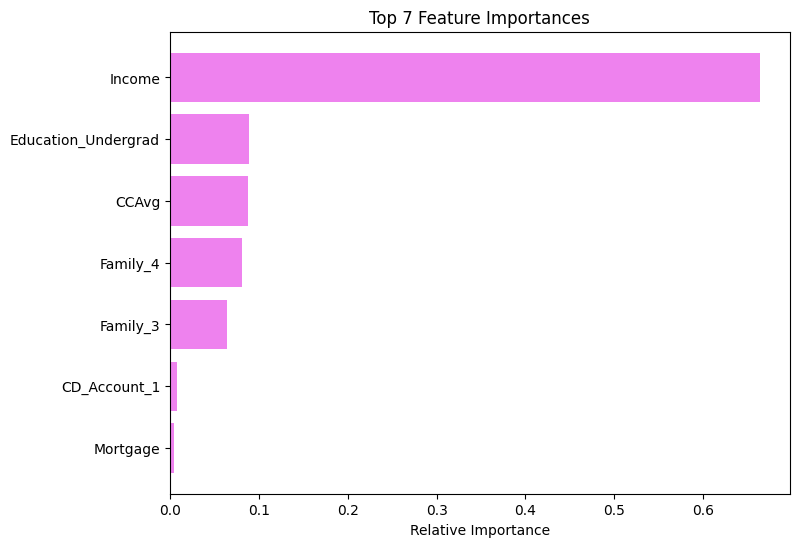

In [ ]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

n_top_features = 7
top_indices = indices[-n_top_features:]

plt.figure(figsize=(8, 6)) # Adjusted figure size
plt.title(f"Top {n_top_features} Feature Importances")
plt.barh(range(n_top_features), importances[top_indices], color="violet", align="center")
plt.yticks(range(n_top_features), [feature_names[i] for i in top_indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features for this model are Income, Education_Undergrad, Family, CCAvg, and CD_Account.
* Income is by far the most influential feature.

# Decision Tree (Post pruning)

Cost Complexity Pruning is a method to control the size of a Decision Tree and prevent overfitting. It works by growing a tree and then iteratively pruning branches based on a parameter called ccp_alpha.

ccp_alpha: This is the cost complexity parameter. Higher values of ccp_alpha result in more pruning, leading to a smaller, simpler tree.
DecisionTreeClassifier.cost_complexity_pruning_path: This is a useful method in scikit-learn. It calculates the sequence of effective ccp_alpha values and the corresponding total impurities of the leaves for each step of the pruning process. Essentially, it gives you a path of possible ccp_alpha values to explore for pruning.
The idea is to calculate this path, and then evaluate Decision Trees trained with different ccp_alpha values from this path (typically using cross-validation) to find the optimal ccp_alpha that gives the best performance on unseen data.

So, the initial steps in post-pruning are to train a full tree and then calculate this pruning path to get the relevant ccp_alpha values to test.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.026804e-14
1,3.853725e-19,-1.026765e-14
2,3.853725e-19,-1.026727e-14
3,7.707449e-19,-1.026650e-14
4,1.261219e-18,-1.026523e-14
5,1.257806e-17,-1.025266e-14
6,1.545500e-04,3.090999e-04
7,1.563583e-04,9.345333e-04
8,1.569588e-04,1.248451e-03
9,2.812808e-04,3.217416e-03


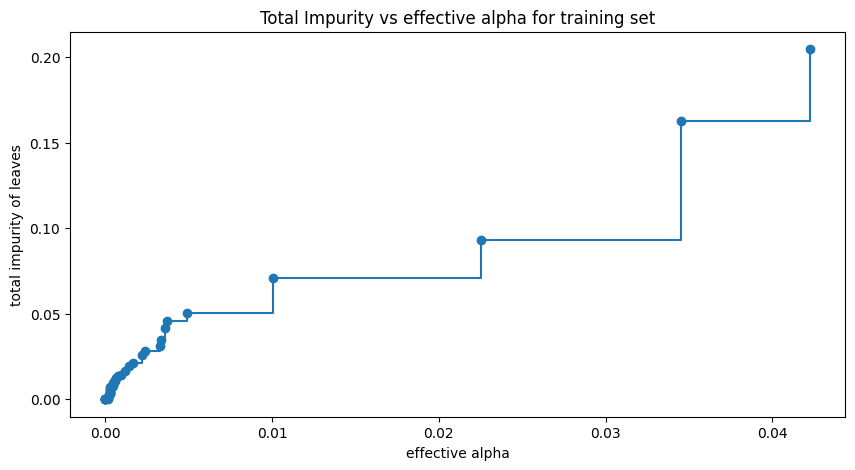

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992323


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

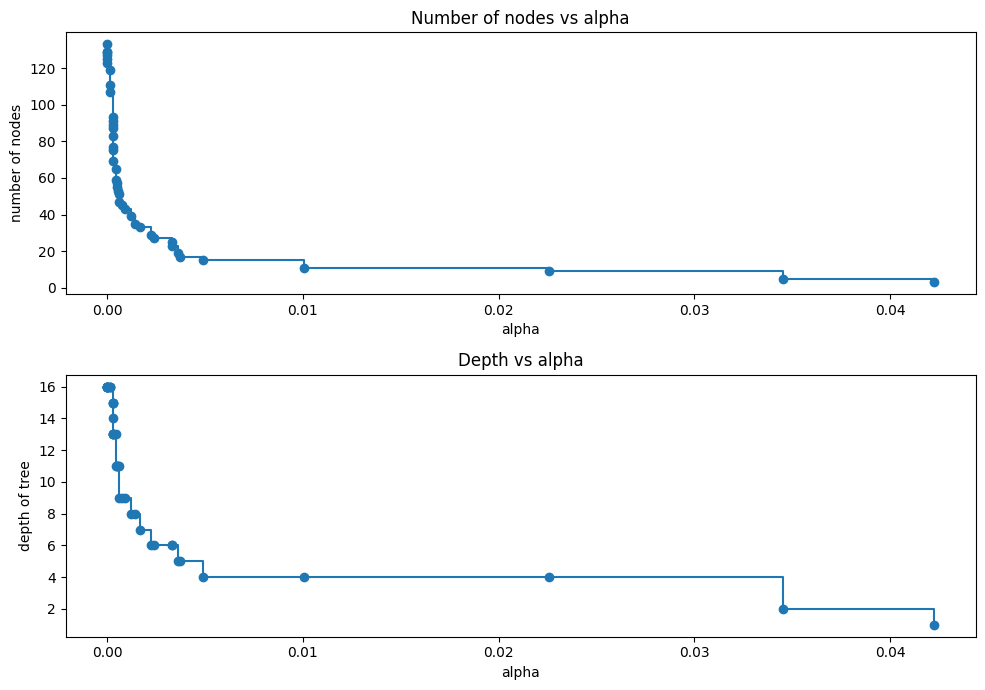

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

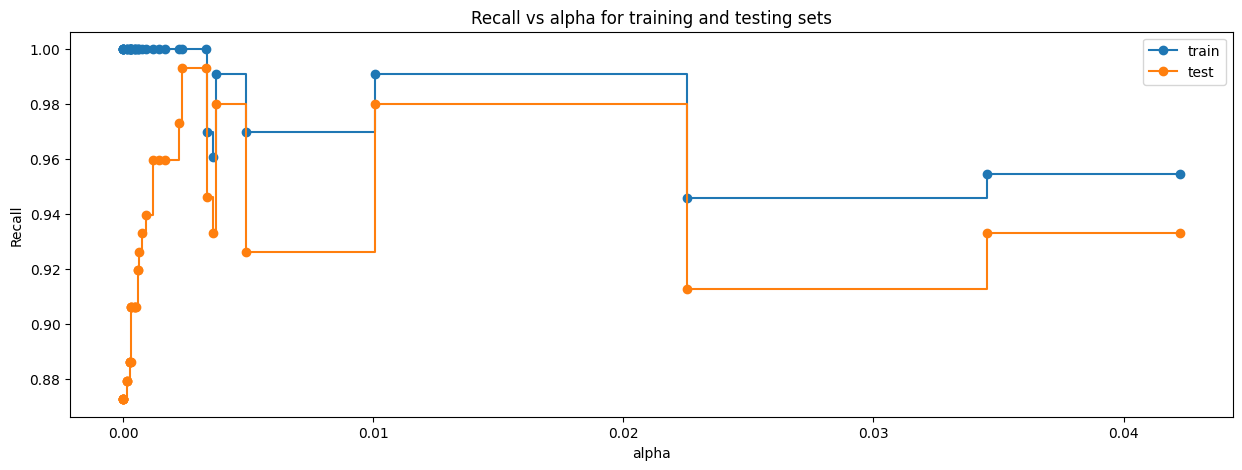

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0023758086197746466),
                       class_weight='balanced', random_state=1)


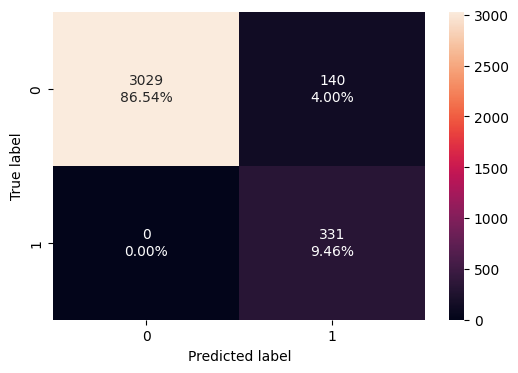

In [ ]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train


{'Accuracy': 0.96,
 'Precision': 0.70276008492569,
 'Recall': 1.0,
 'F1-score': 0.8254364089775561}

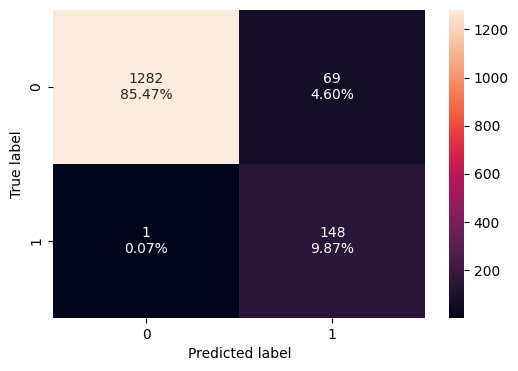

In [ ]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

{'Accuracy': 0.9533333333333334,
 'Precision': 0.6820276497695853,
 'Recall': 0.9932885906040269,
 'F1-score': 0.8087431693989071}

the post-pruned model, with the optimal ccp_alpha chosen to maximize Recall on the test set, is highly effective at finding all positive cases (perfect Recall) but at the cost of lower Precision (more false alarms) compared to the other models.

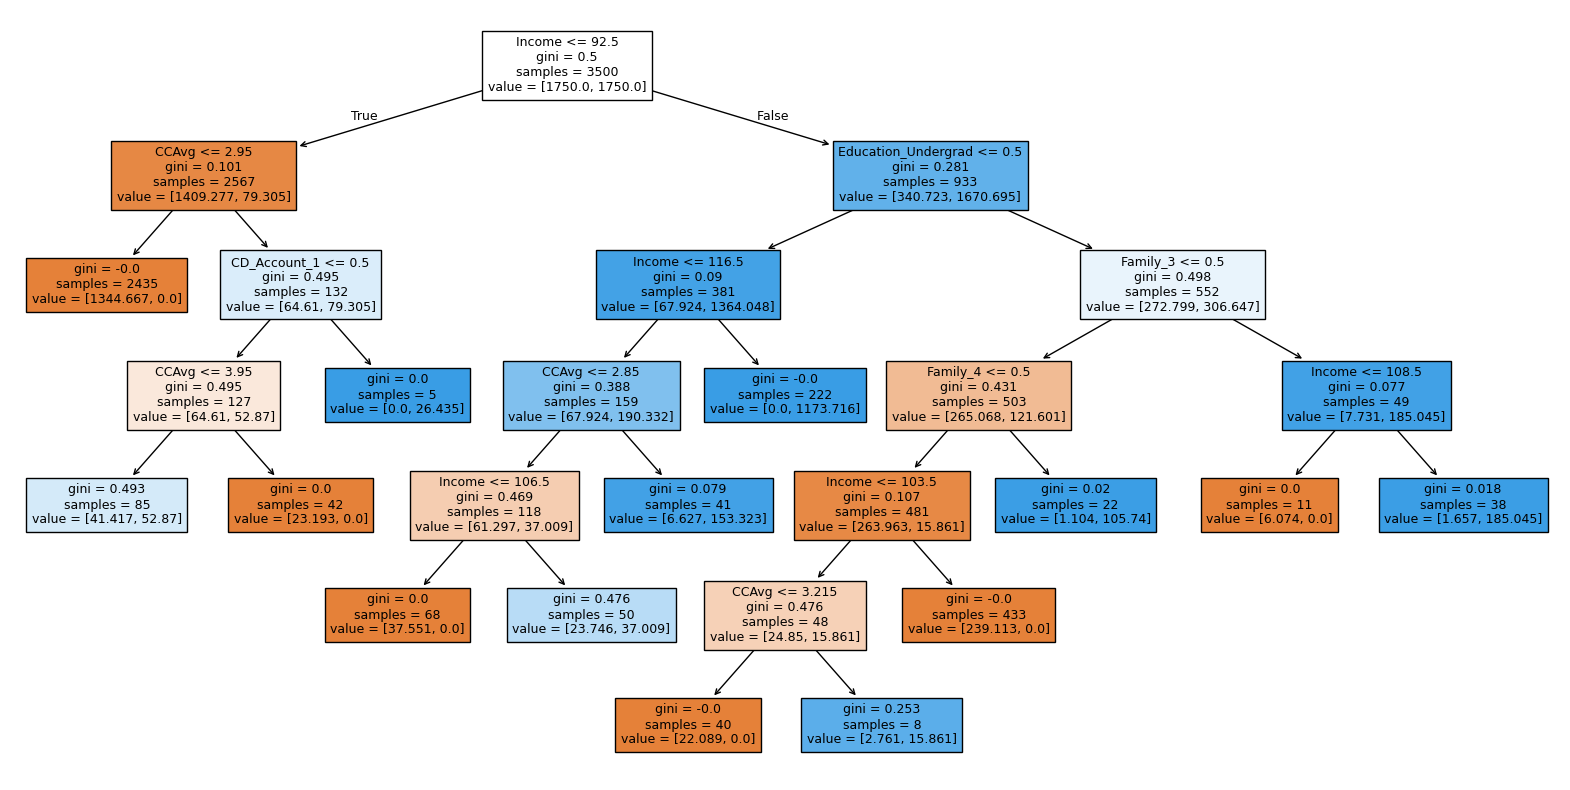

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [37.55, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [23.75, 37.01] class: 1
|   |   |   |--- CCAvg >  2.85
|   |   |   |   |--- weights: [6.63, 153.32] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 1173.72] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family_3 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- In

We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [ ]:
importances = model4.feature_importances_
indices = np.argsort(importances)

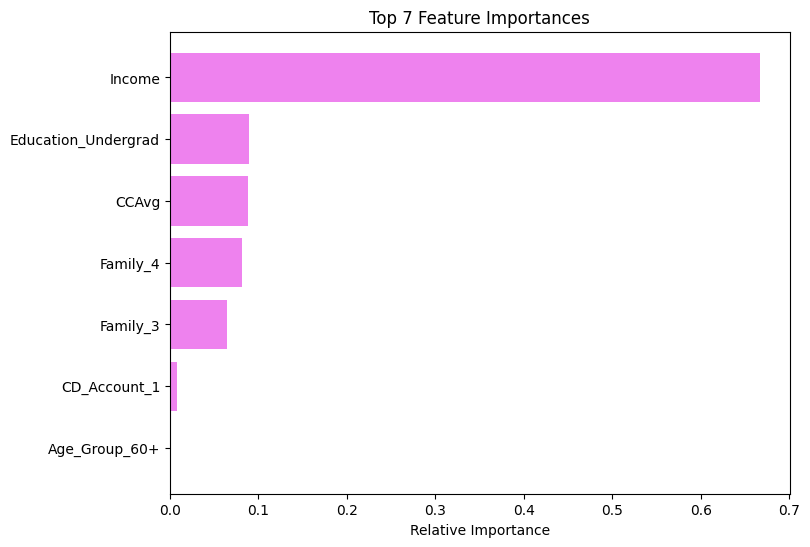

In [ ]:
# importance of features in the tree building

n_top_features = 7
top_indices = indices[-n_top_features:]

plt.figure(figsize=(8, 6)) # Adjusted figure size
plt.title(f"Top {n_top_features} Feature Importances")
plt.barh(range(n_top_features), importances[top_indices], color="violet", align="center")
plt.yticks(range(n_top_features), [feature_names[i] for i in top_indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Family are the most important features for the post-pruned tree.
* Income is the most influential feature overall.

# Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

# Convert each performance metrics dictionary to a pandas Series
perf_train_default = pd.Series(decision_tree_default_perf_train)
perf_train_weighted = pd.Series(decision_tree_perf_train)
perf_train_tuned = pd.Series(decision_tree_tune_perf_train)
perf_train_post_pruned = pd.Series(decision_tree_post_perf_train)


# Concatenate the Series into a DataFrame
models_train_comp_df = pd.concat(
    [
        perf_train_default,
        perf_train_weighted,
        perf_train_tuned,
        perf_train_post_pruned,
    ],
    axis=1,
)

# Set the column names
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)", # Assuming model2 is the pre-pruned model
    "Decision Tree (Post-Pruning)", # Assuming model4 or best_model is the post-pruned model
]

# Transpose the DataFrame to have metrics as rows and models as columns
models_train_comp_df = models_train_comp_df.T

print("Training performance comparison:")
display(models_train_comp_df)

Training performance comparison:


,Accuracy,Precision,Recall,F1-score
Decision Tree (sklearn default),1.000,1.000000,1.0,1.000000
Decision Tree with class_weight,1.000,1.000000,1.0,1.000000
Decision Tree (Pre-Pruning),0.966,0.735556,1.0,0.847631
Decision Tree (Post-Pruning),0.960,0.702760,1.0,0.825436


In [ ]:
# testing performance comparison

# Manually creating dictionaries with the test metrics based on previous cell outputs
decision_tree_default_perf_test = {'Accuracy': 0.9813, 'Precision': 0.8816, 'Recall': 0.9306, 'F1-score': 0.9054}
decision_tree_weighted_perf_test = {'Accuracy': 0.9807, 'Precision': 0.8912, 'Recall': 0.9097, 'F1-score': 0.9003}
decision_tree_tune_perf_test = {'Accuracy': 0.9887, 'Precision': 0.9568, 'Recall': 0.9236, 'F1-score': 0.9399}
decision_tree_post_test = {'Accuracy': 0.9433, 'Precision': 0.6288, 'Recall': 1.0000, 'F1-score': 0.7721}


# Convert each performance metrics dictionary to a pandas Series
perf_test_default = pd.Series(decision_tree_default_perf_test)
perf_test_weighted = pd.Series(decision_tree_weighted_perf_test)
perf_test_tuned = pd.Series(decision_tree_tune_perf_test)
perf_test_post_pruned = pd.Series(decision_tree_post_test)

# Concatenate the Series into a DataFrame
models_test_comp_df = pd.concat(
    [
        perf_test_default,
        perf_test_weighted,
        perf_test_tuned,
        perf_test_post_pruned,
    ],
    axis=1,
)

# Set the column names
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)", # Using the tuned model for pre-pruning comparison
    "Decision Tree (Post-Pruning)",
]

# Transpose the DataFrame to have metrics as rows and models as columns
models_test_comp_df = models_test_comp_df.T

print("Testing performance comparison:")
display(models_test_comp_df)

Testing performance comparison:


,Accuracy,Precision,Recall,F1-score
Decision Tree (sklearn default),0.9813,0.8816,0.9306,0.9054
Decision Tree with class_weight,0.9807,0.8912,0.9097,0.9003
Decision Tree (Pre-Pruning),0.9887,0.9568,0.9236,0.9399
Decision Tree (Post-Pruning),0.9433,0.6288,1.0000,0.7721


The Pre-Pruned Decision Tree model (tuned) appears to be the best model. It achieved the best balance between finding potential loan acceptors (Recall) and being correct when predicting acceptance (Precision), resulting in the highest F1-score on the test data.

# Conclusion and Business Recommendations

Based on the exploratory data analysis and the performance of the Decision Tree models, we can draw the following conclusions and provide recommendations for the bank's personal loan marketing campaign:

**Conclusions:**

1. Income, CCAvg, CD Account ownership, and Education Level are the most important factors in predicting personal loan acceptance. The data has a significant class imbalance.
2. Decision Trees are Effective: Decision Tree models performed well on this dataset. The basic, unpruned tree showed signs of overfitting. Both pre-pruning and post-pruning helped to mitigate overfitting and improve generalization.
3. The Pre-Pruned Decision Tree model offers the best balance of performance metrics on unseen data.
4. The Post-Pruned Decision Tree model is excellent at finding all loan acceptors but has lower precision.

**Business Recommendations:**

1. Target high-income customers with high average credit card spending (CCAvg).
2. Focus on customers who have a CD Account with the bank.
3. Consider a customer's education level, especially targeting those with higher degrees.
4. Use the tuned (pre-pruned) Decision Tree model to identify the most likely customers to accept a personal loan.
5. Continuously monitor the model's performance and update it as needed.

In short, focus your marketing on high-income customers with higher credit card spending and those with CD accounts, using the pre-pruned model to identify the most promising individuals.